# SPRING FLOOD ANALYSIS

1. Click box below and choose sheet in excel that you want to do an analysis for.
2. Click on Cell -> Run All

In [3]:
#Choosing LTM model
# Norg, Sver, LTM1,..LTM8, LTMS
sheet = 'LTM4'

In [117]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [11]:
import sys

path = '\\\\energycorp\\applications\\OSL\\jupyter_notebooks\\personalfolders\\MEHO\\spring-flod-analysis'
sys.path.insert(0, path)

import modules as m

%load_ext autoreload
%autoreload 2

print('\n------------------------------------------------------------------------------------------------------\n')
print('                                                  {}                                                '.format(sheet))
print('\n------------------------------------------------------------------------------------------------------\n')
file = r'spring_flod_analysis.xlsx'


#Reading in all info from chosen sheet in Excel file: 'spring_flod_analysis.xlsx' 
#and always prints dates for when saved models started from
excel_output = m.read_from_excel(sheet, file)
all_keys, idnr, start_list, end_list, excluded_list, vhhQ_OBSE_list, diff_temp_keys, comments_list, measured_list = excel_output


#Reading in all time_series from SMG and saved time series in the folders: TEMP1 and REF
all_df, all_resources = m.read_timeseries(all_keys, idnr, vhhQ_OBSE_list, diff_temp_keys, sheet, measured_list)

#change to bold letters for those who have had measured snow
if sheet[0:3] == 'LTM':
    all_keys = [r"$\bf{" + key + "}$" if key in measured_list else key for key in all_keys] 
    bold_list = [r"$\bf{" + key + "}$" for key in measured_list]
    

#Making new df for all models for analyis period
analysis_periods_output = m.find_analysis_periods(all_df, all_resources, start_list, end_list, sheet)
spring_flod_start, info_chosen_start, spring_flod_end, info_chosen_end, early_adj_start, late_adj_start = analysis_periods_output

df_analysis_period = []
for df, start, end in zip(all_df, spring_flod_start, spring_flod_end):
    df_analysis_period.append(df[start:end])
m.summary_table(df_analysis_period, all_keys, sheet, bold_list)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

------------------------------------------------------------------------------------------------------

                                                  LTM4                                                

------------------------------------------------------------------------------------------------------

Time saved models were started from:
REF: 2019-01-01 00:00:00
TEMP1: 2019-04-04 00:00:00


# Performance According to Accumulated Inflow [%] Error 

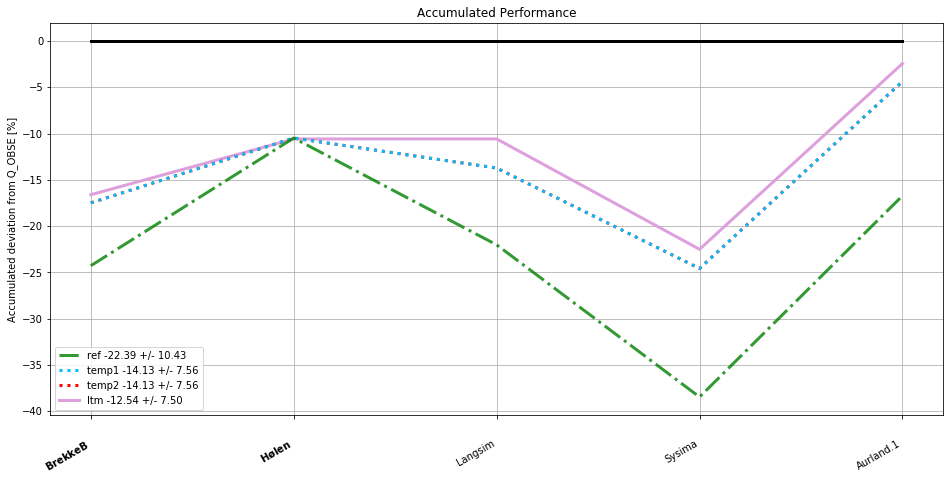

In [12]:
#Calculating performance of the models
acc_perf_all = m.calc_performance(all_df, all_keys, spring_flod_start, spring_flod_end, bold_list) 

#plot performance for models in the LTM model
m.plot_perf_models(acc_perf_all, sheet, perfType='Accumulated')


## BOX AND WHISKER PLOT ACCUMULATIVE DEVIATION FROM Q_OBSE


Excluded in this analysis:
duge
tingvat




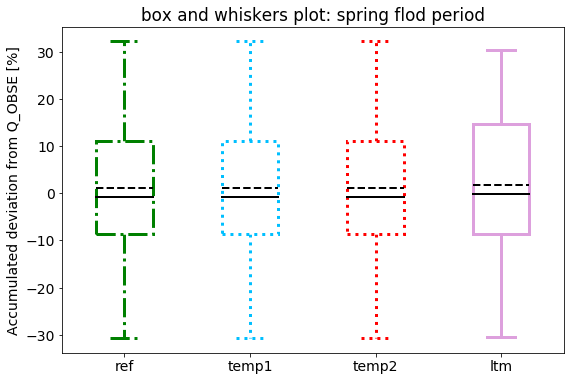

In [120]:
#Excluding columns that are chosen to be excluded in the Excel document
excluded_keys = m.exclude_keys(all_keys, excluded_list)

# calculationg preformance for included keys
acc_perf_inc = m.calc_performance(all_df, all_keys, spring_flod_start, spring_flod_end, excluded_keys) 

if sheet == 'Norg':
    acc_perf = acc_perf_inc.drop('Norge')
elif sheet == 'Sver':
    acc_perf = acc_perf_inc.drop('Sverige')
else:
    acc_perf = acc_perf_inc

m.box_plot(acc_perf)

## SNOW ADJUSTMENTS: BETTER or WORSE?

AUSTENÅ -12.226342587527407 -16.359781695889012
duge -2.8136536728560313 -12.005110160421454
mår.... 12.800447869955564 11.526731167610297
saurdal -4.536106213922491 -9.454741650194066
songa.. -13.674064798640606 -2.6251109298833333
songa_møsvatn -13.687541809896372 -3.5451589462660067
tingvat -6.007499283806569 -7.569514642876683
duge -2.8136536728560313 -12.005110160421454
songa.. -13.674064798640606 -2.6251109298833333
songa_møsvatn -13.687541809896372 -3.5451589462660067


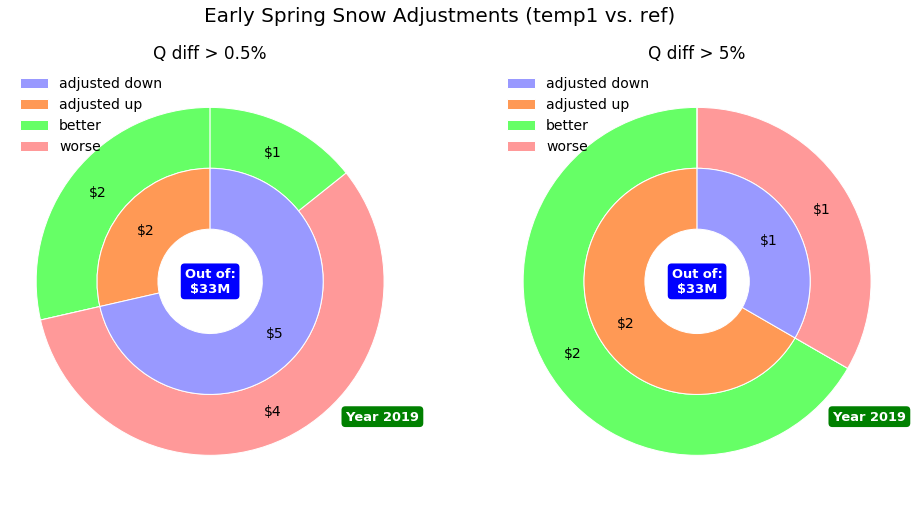

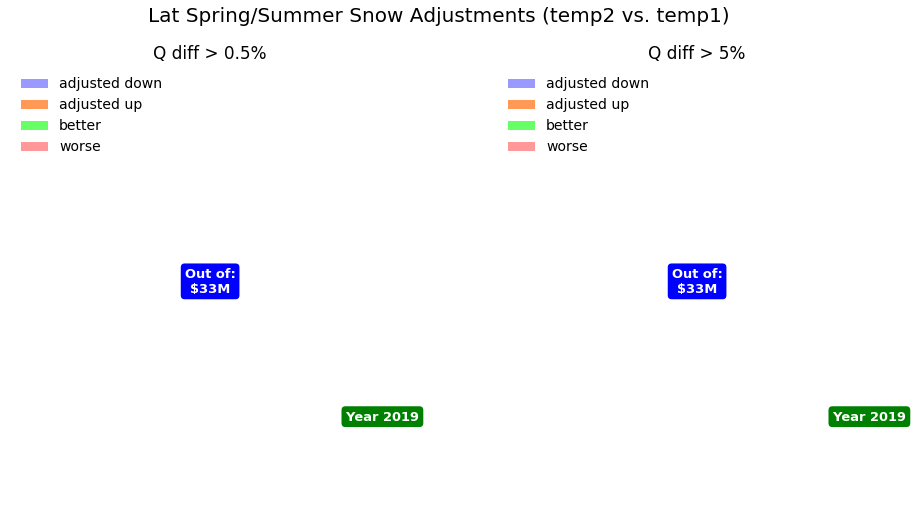

In [121]:
# calculationg preformance for included keys and first analysis period
acc_perf_adj1 = m.calc_performance(all_df, all_keys, early_adj_start, spring_flod_end, excluded_keys) 
m.pie_subplot_perf(acc_perf_adj1, sheet, 'ref', 'temp1')


# calculationg preformance for included keys and first analysis period
acc_perf_adj2 = m.calc_performance(all_df, all_keys, late_adj_start, spring_flod_end, excluded_keys) 
m.pie_subplot_perf(acc_perf_adj2, sheet, 'temp1', 'temp2')


# Induvidual Analysis for Each Model




------------------------------------------------------------------------------------------------------------------------
                                                        Austenå
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-09 00:00): read from excel.
Analysis end (2019-10-24): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 10 GWh SWE.

Comment from Excel file: "Ble kjølt masse ned, noe som hjalp modellen veldig. Pluss at man satset på at tilsiget på vinteren var isoppstuing."



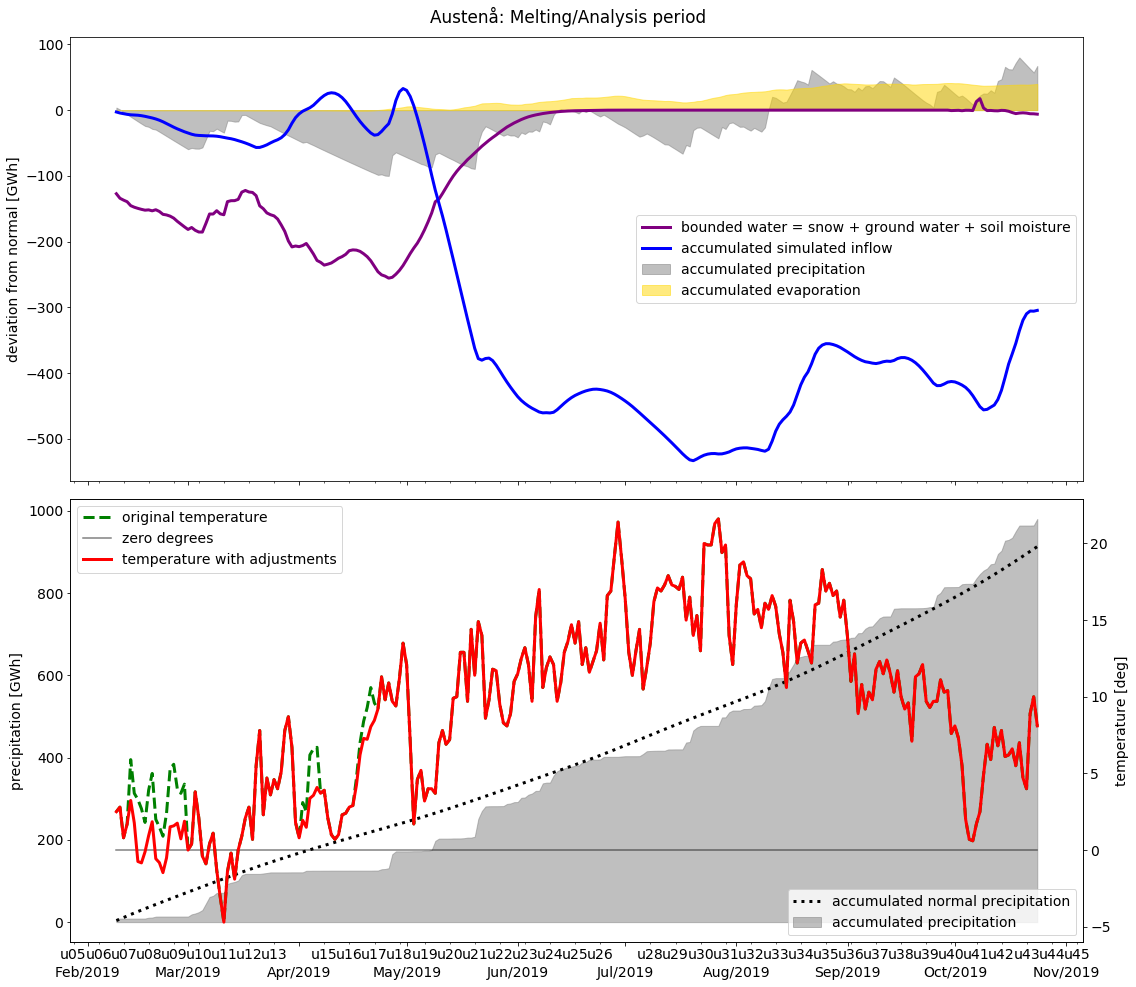

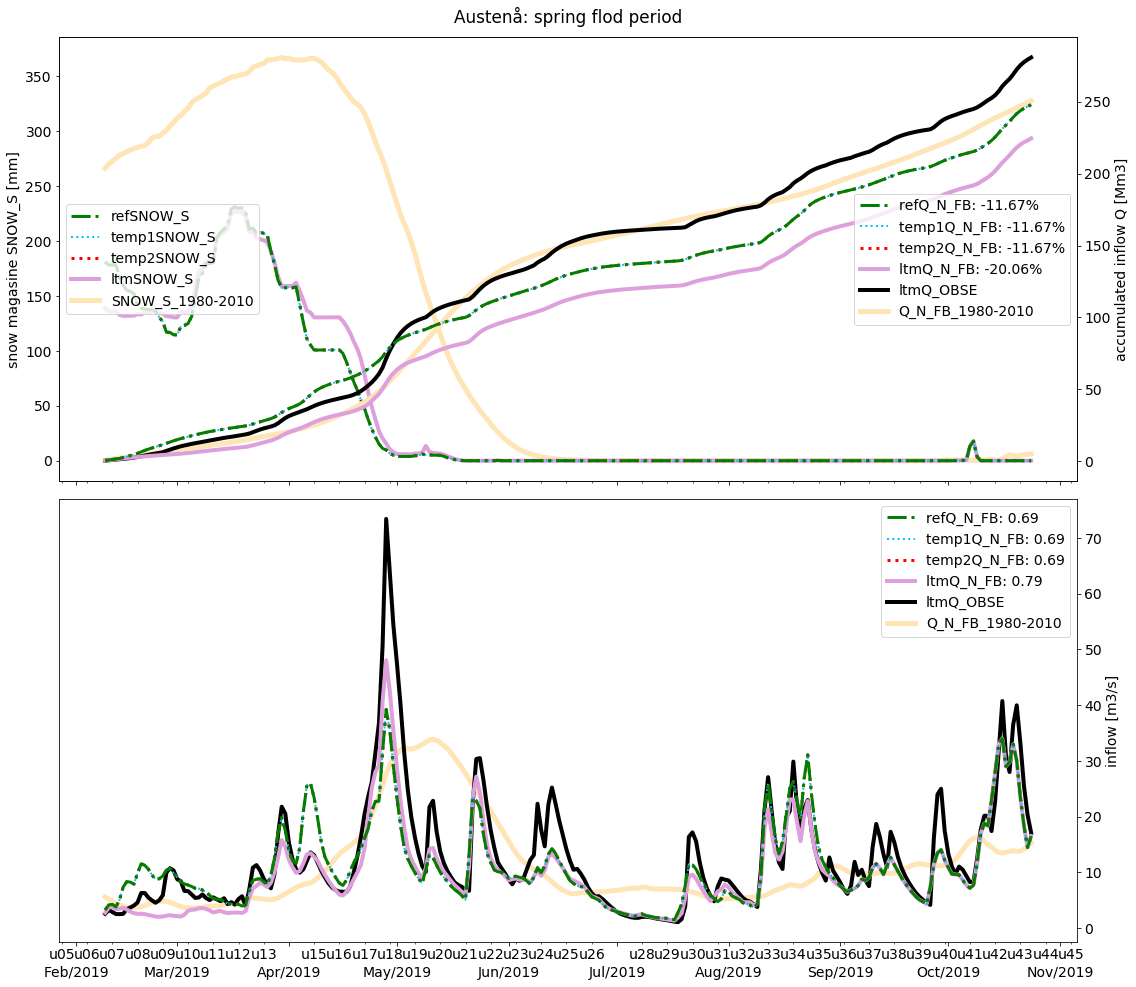

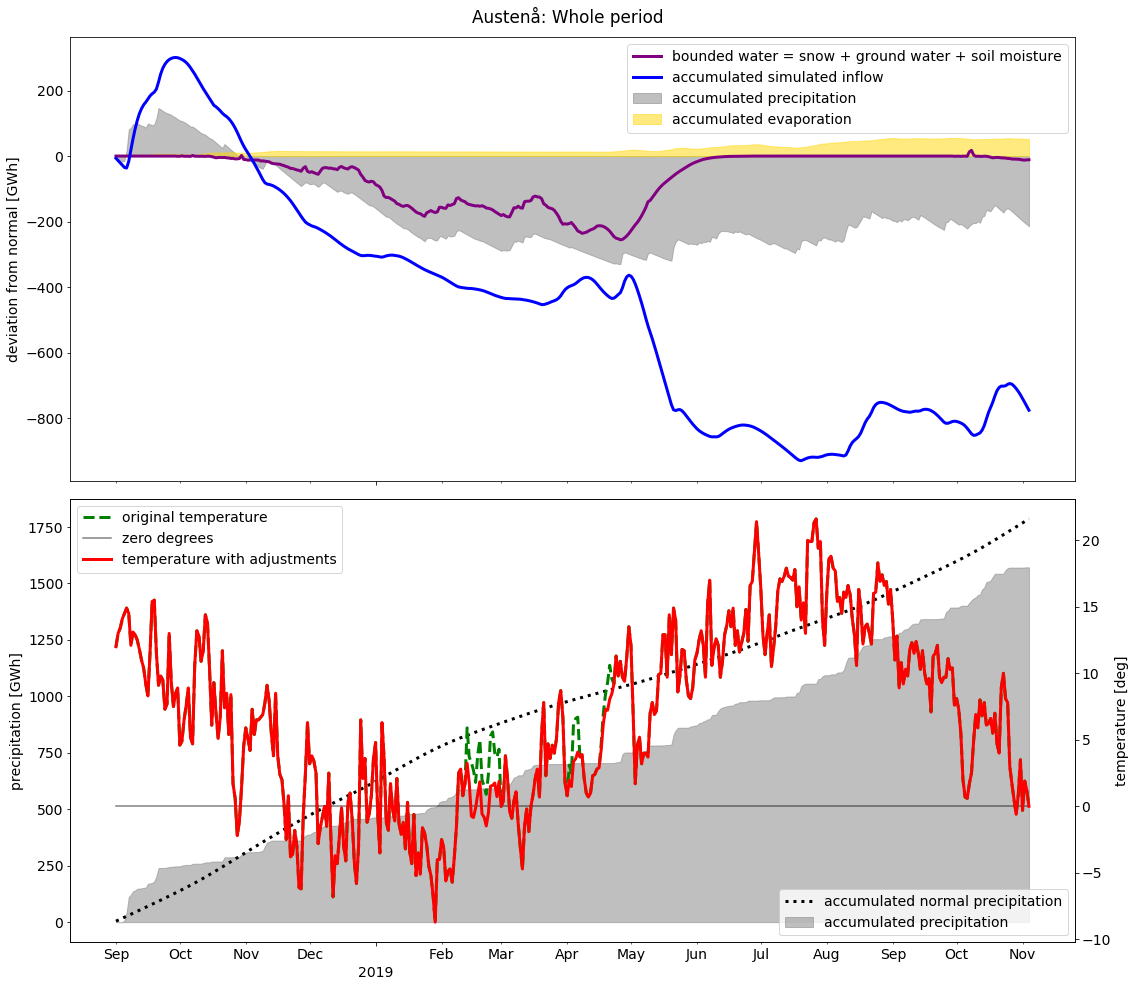

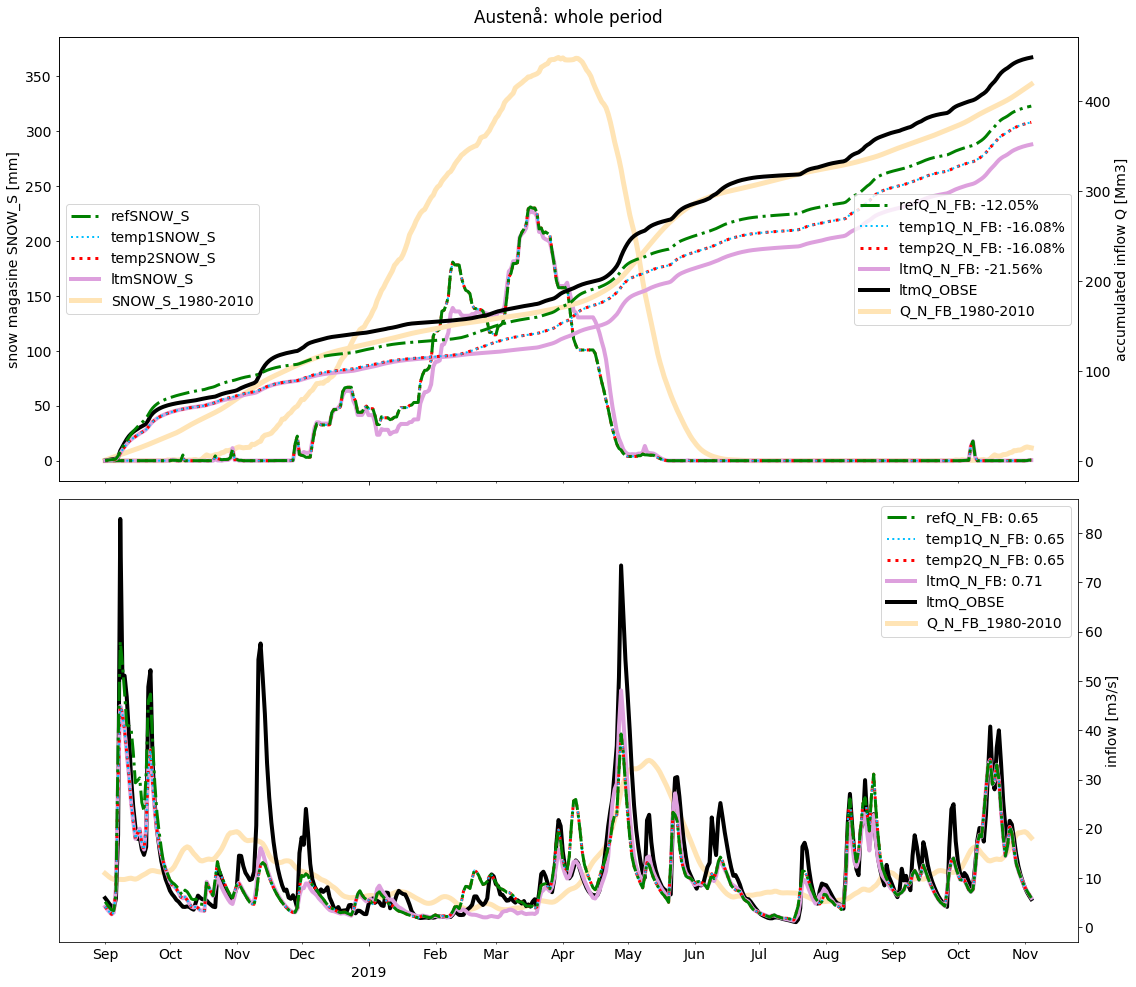








------------------------------------------------------------------------------------------------------------------------
                                                        Byrte
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-25): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-07-21): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.

Comment from Excel file: "For mye snø. Her har det ofte tidligere vært store justeringer."



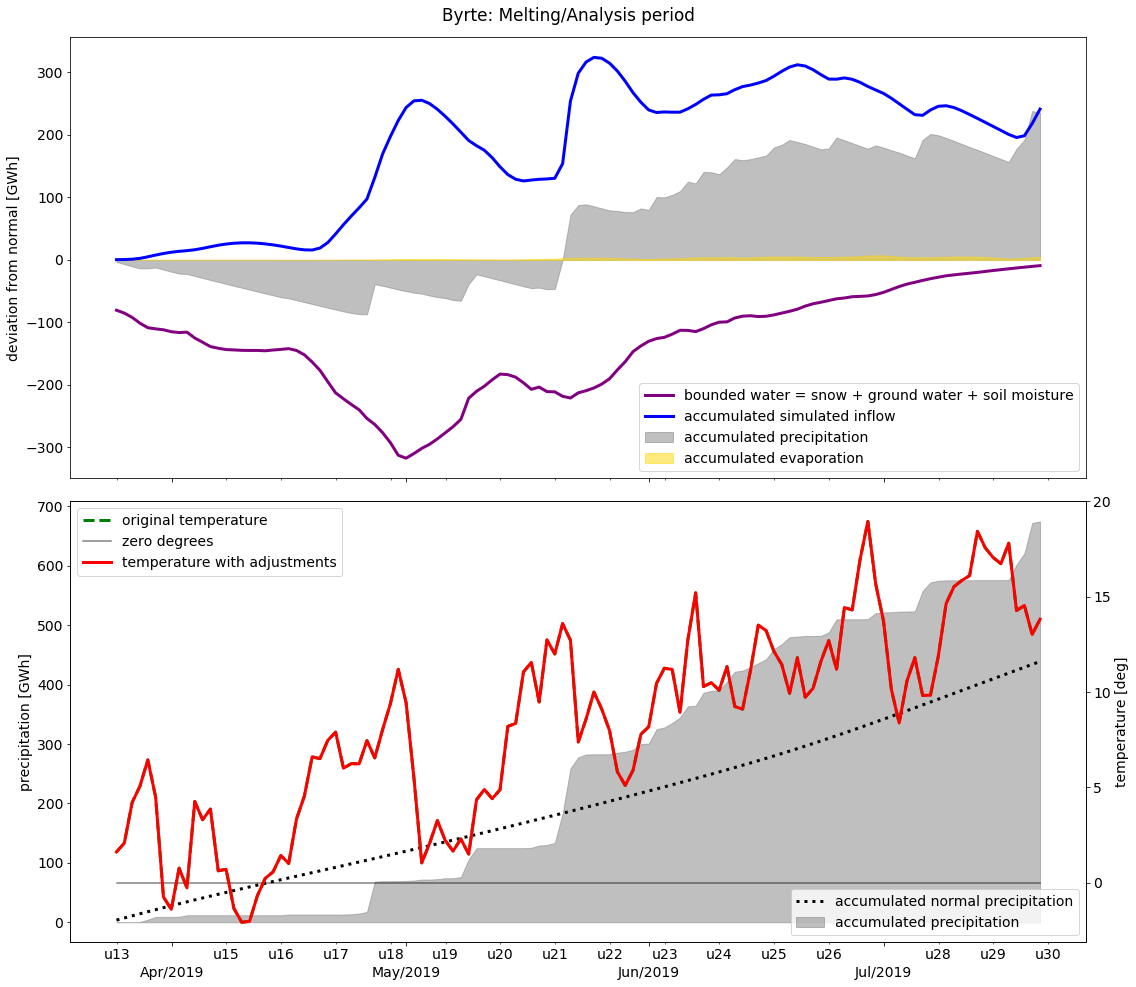

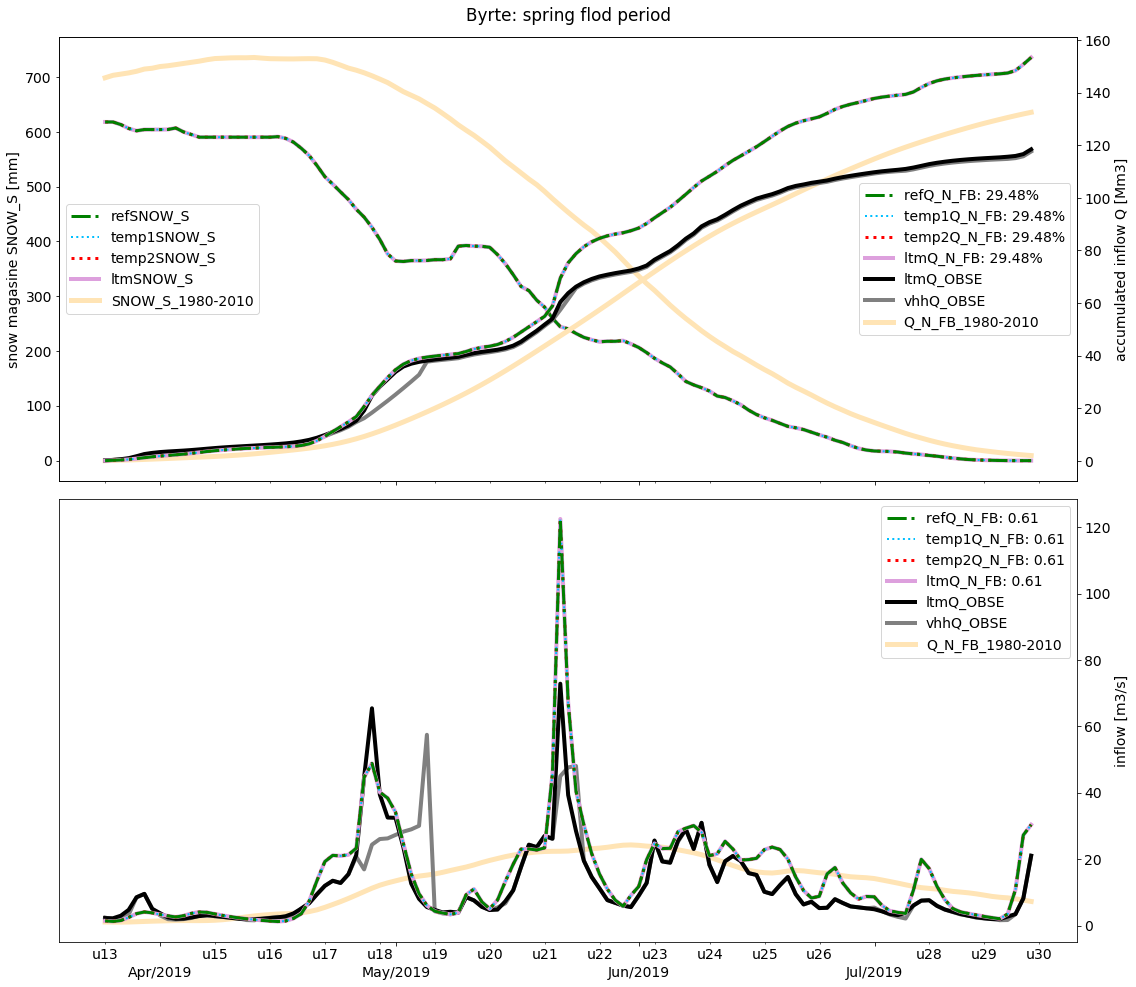

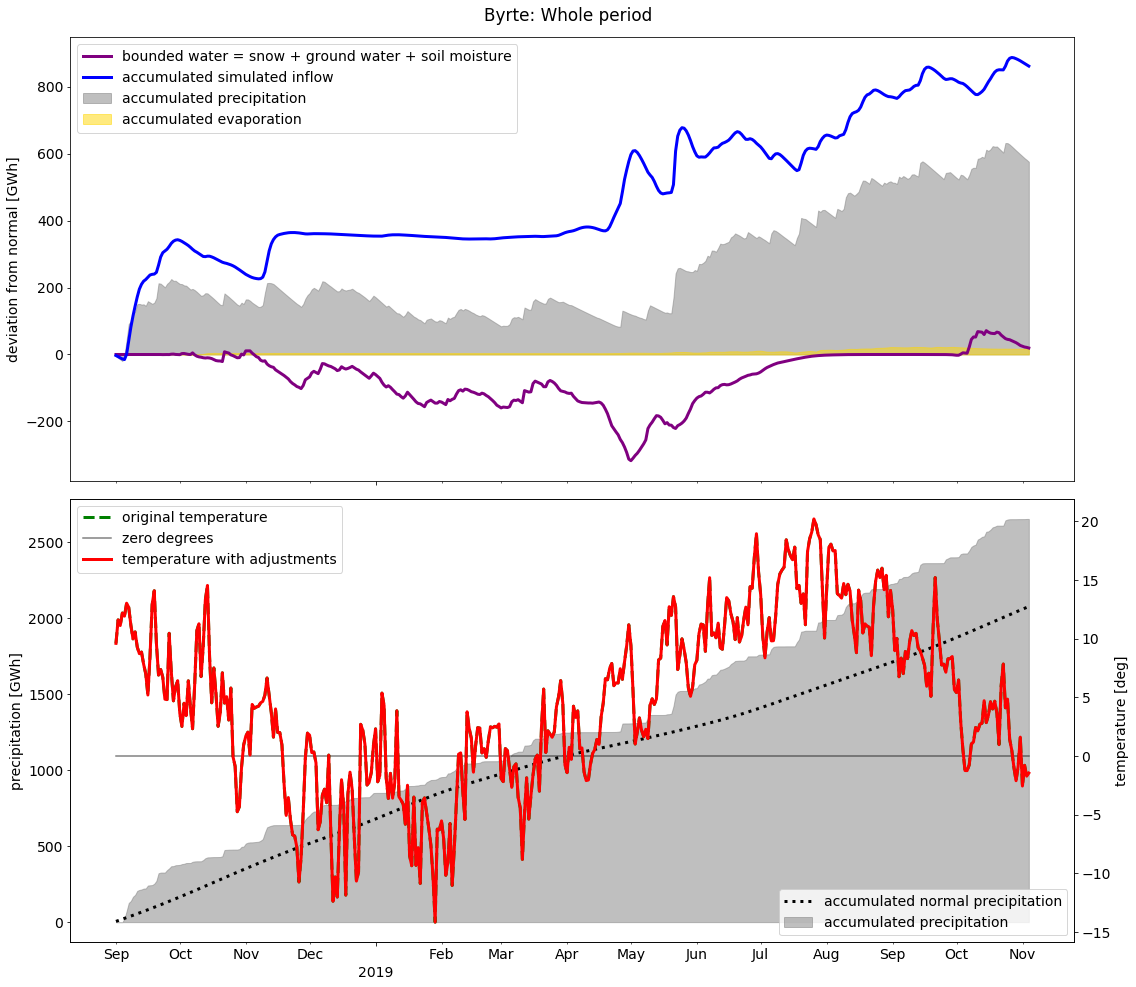

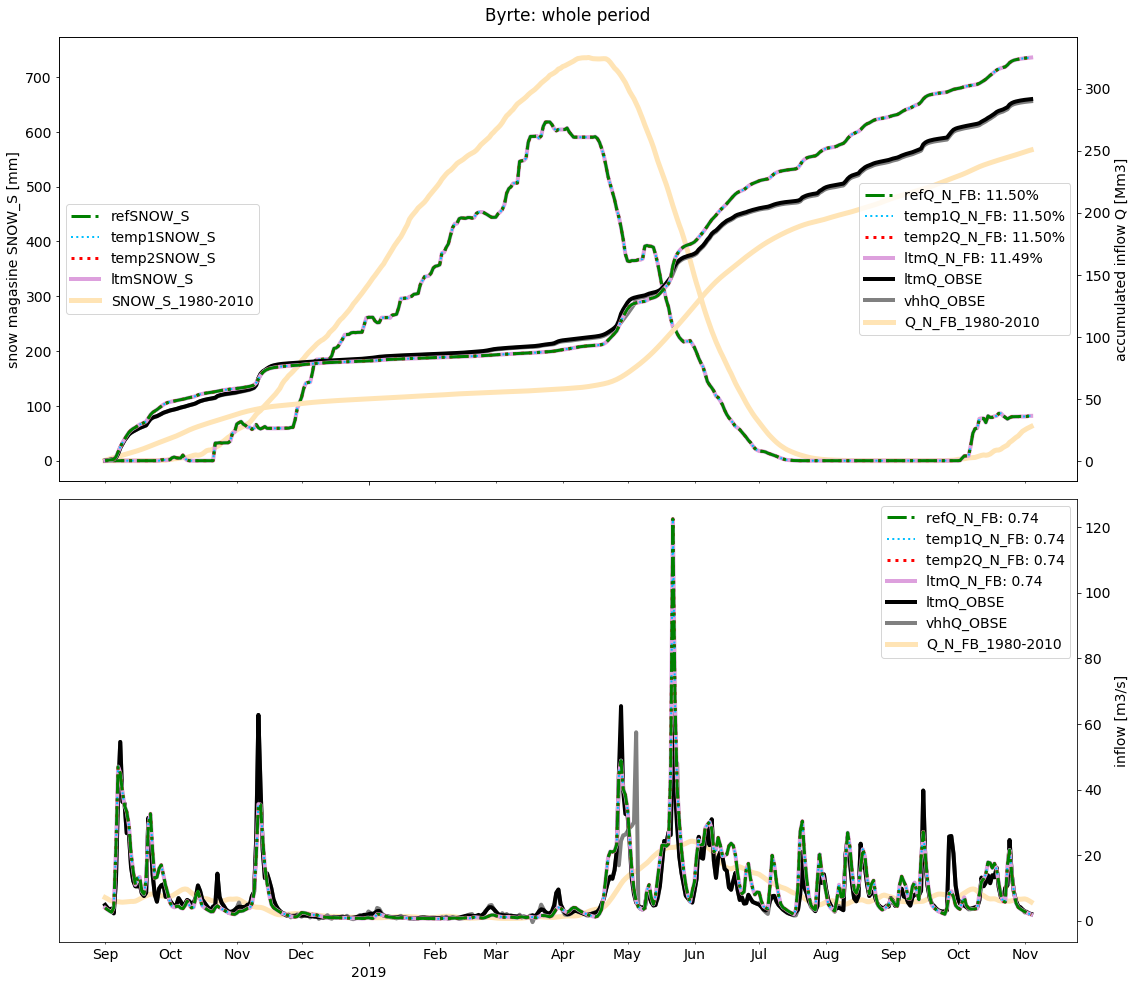








------------------------------------------------------------------------------------------------------------------------
                                                        Duge
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-04-03): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-07-30): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.

Comment from Excel file: "Justerte ned snø, som førte til tap av snøvolum. Her er det feil i prodiksjonsdata. Usikre på observerte data."



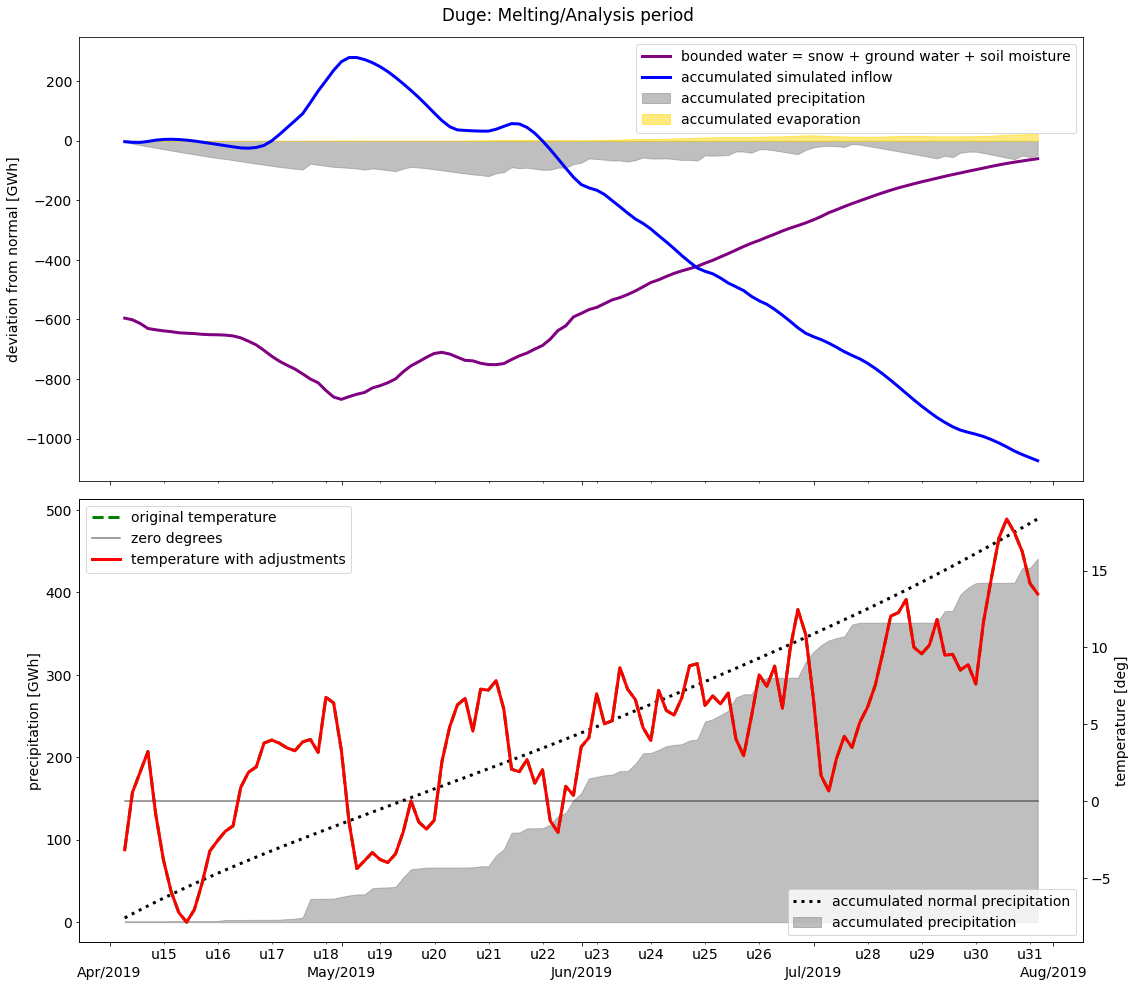

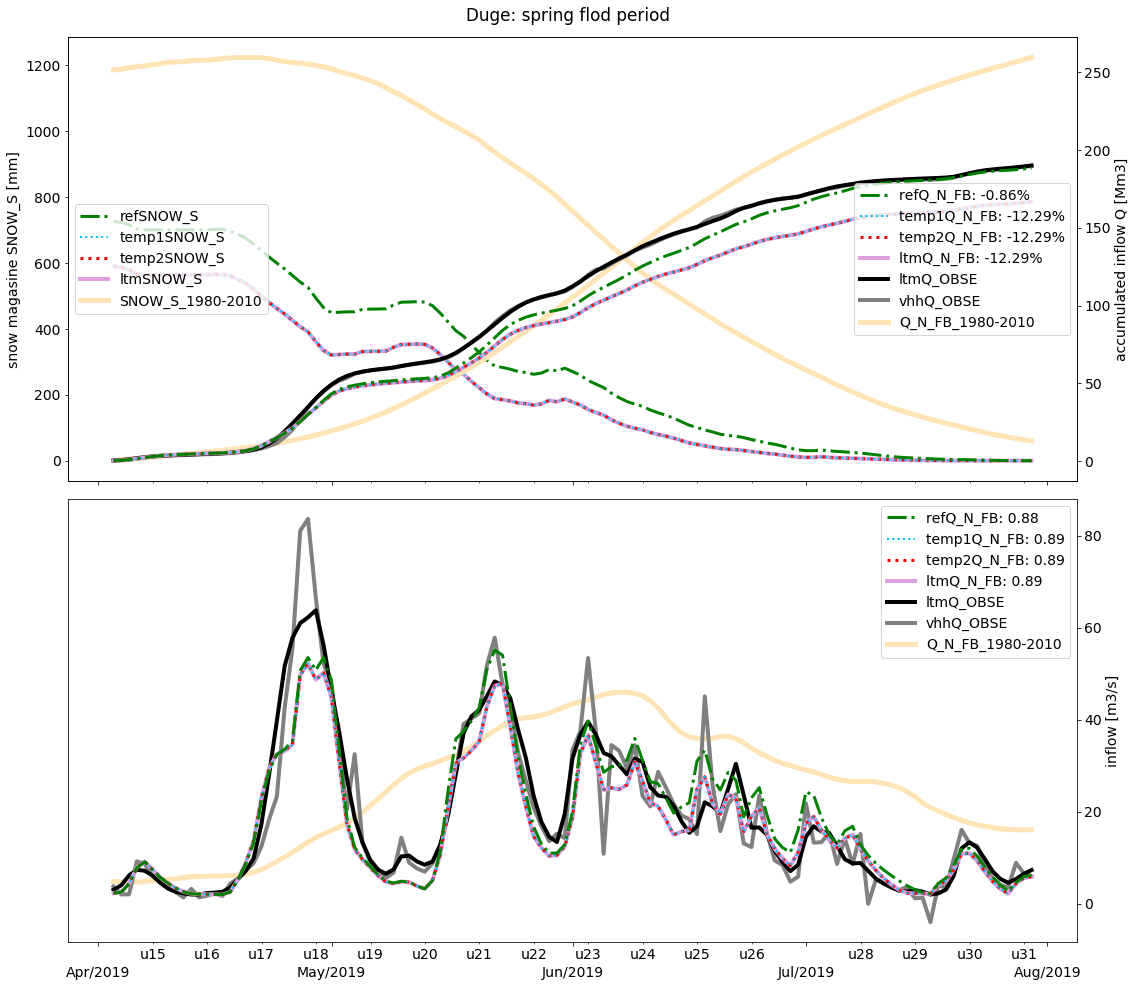

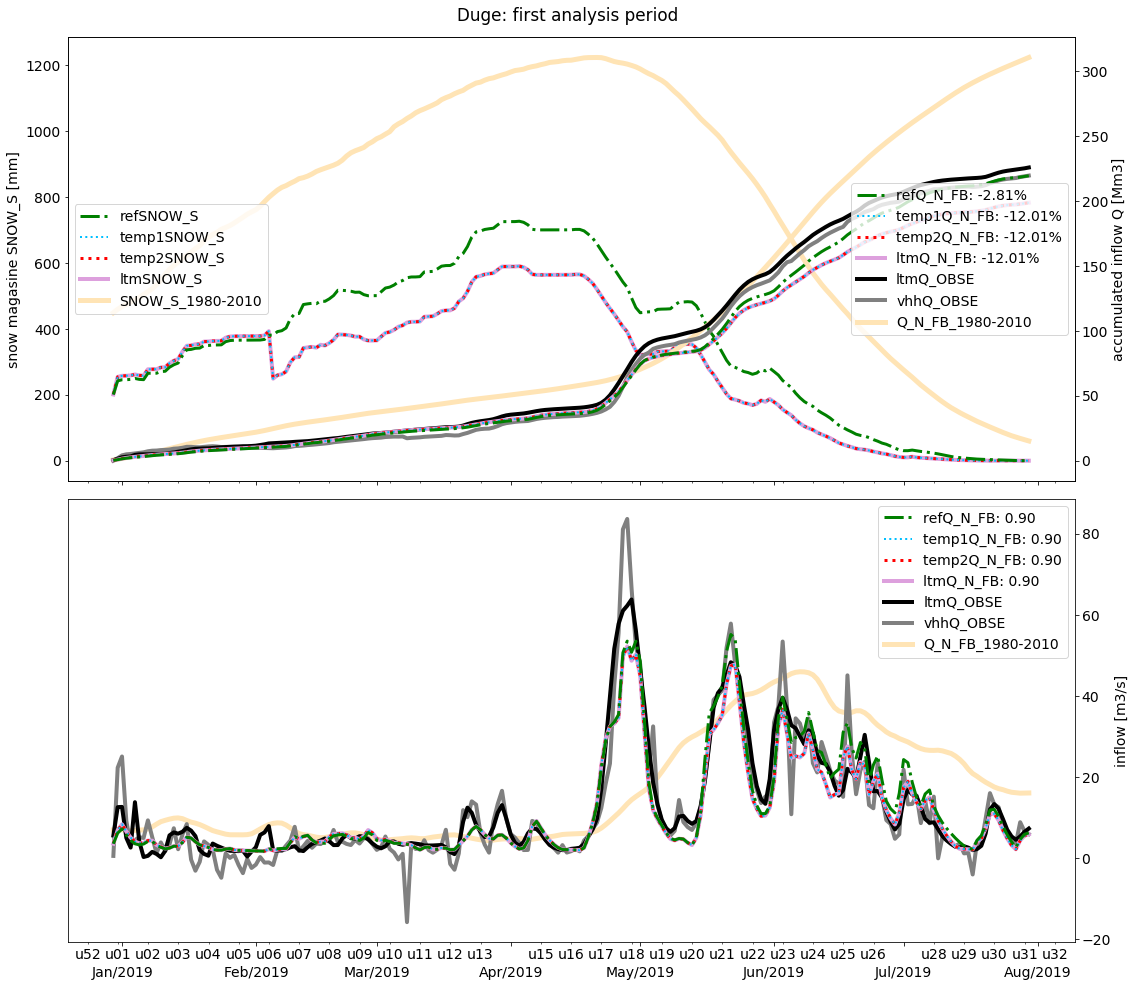

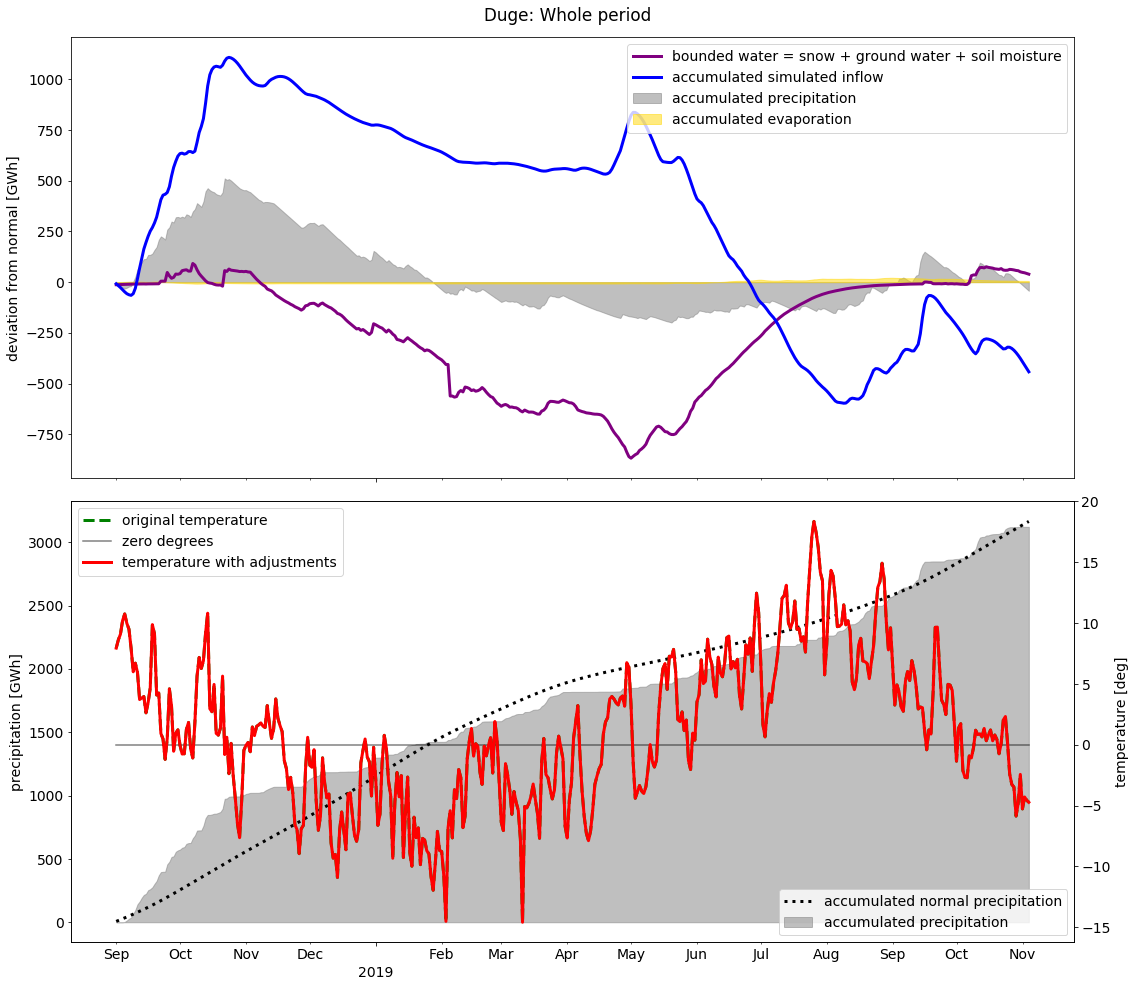

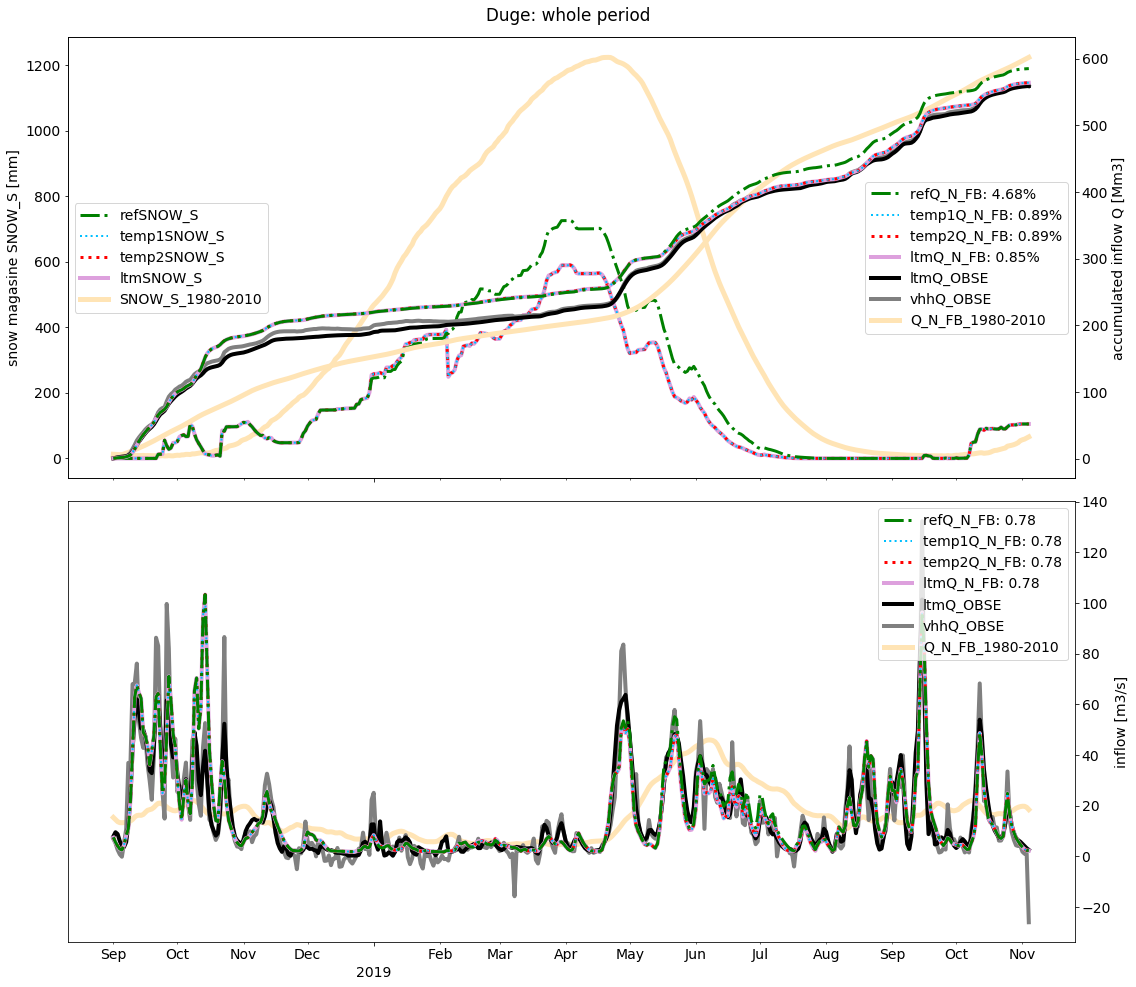








------------------------------------------------------------------------------------------------------------------------
                                                        Flaksva
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-09): Peak of snow magasine for ref inndatasett.
Analysis end (2019-05-05): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 10 GWh SWE.


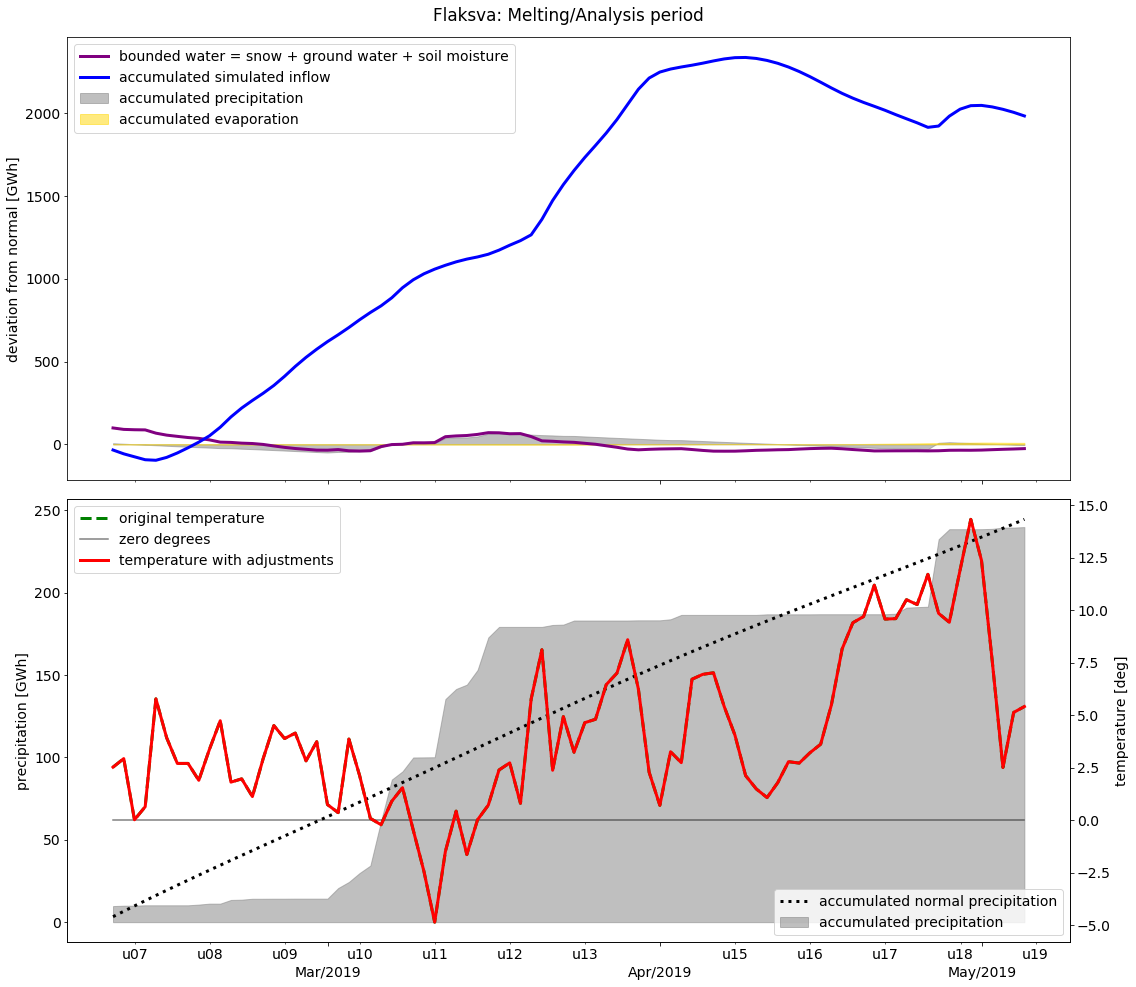

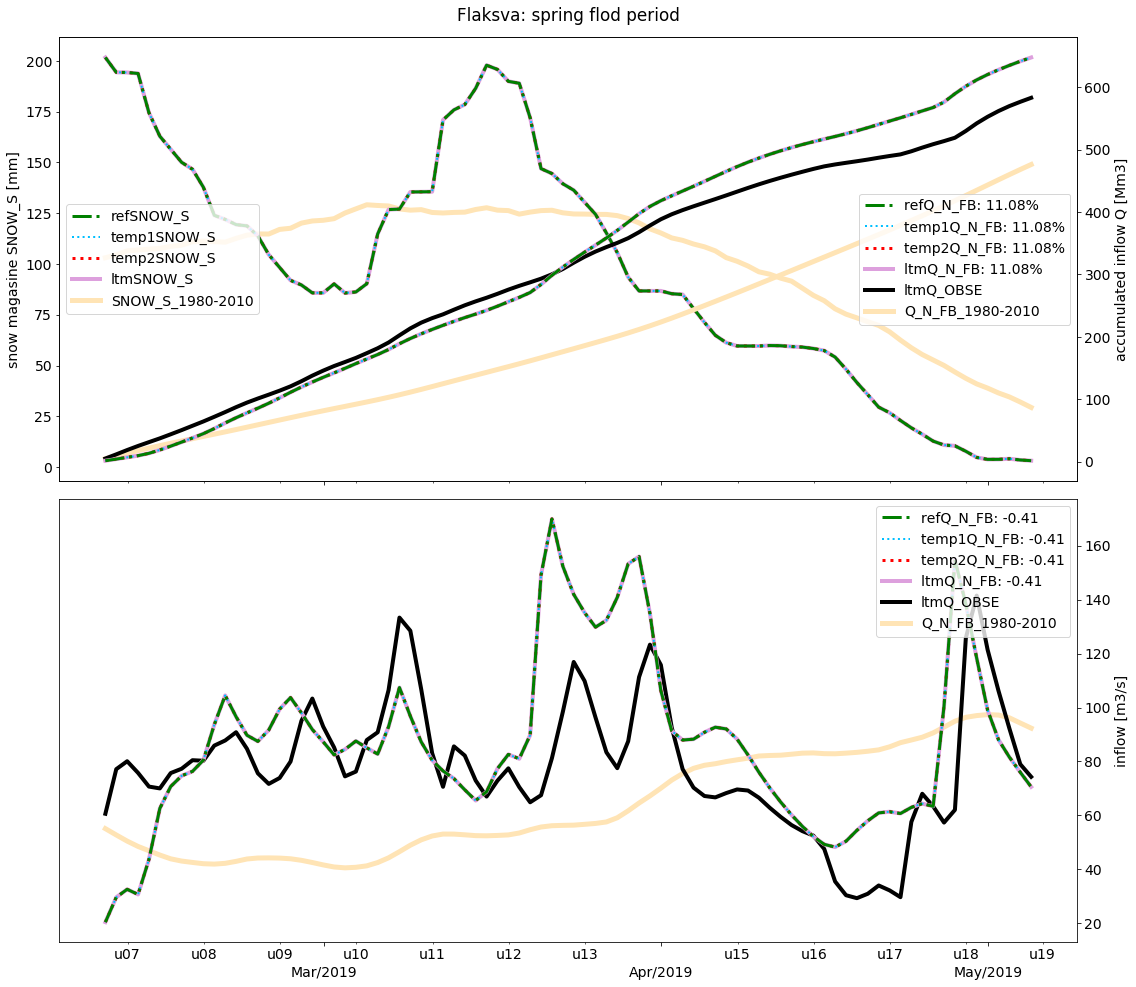

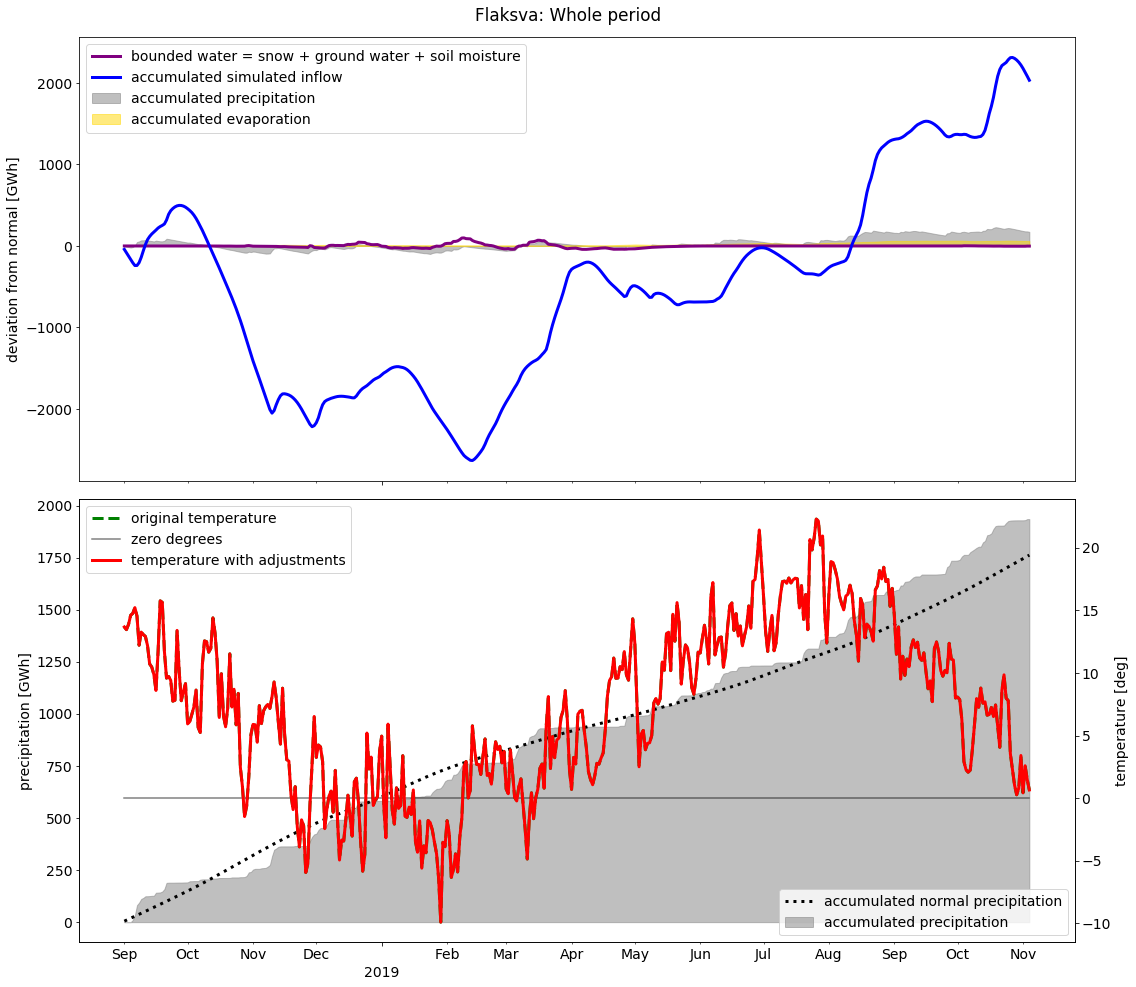

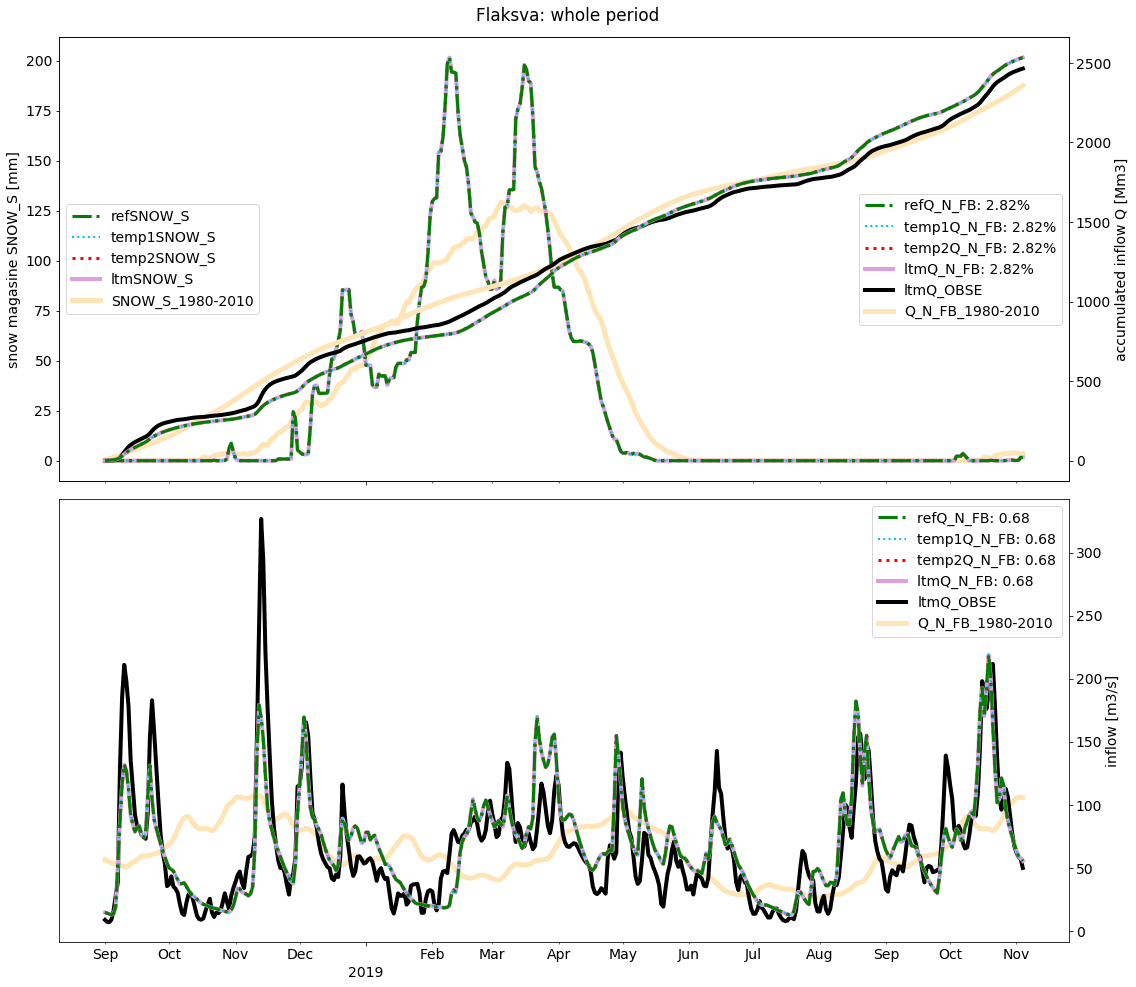








------------------------------------------------------------------------------------------------------------------------
                                                        Fønnerd
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-04-02): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-10-18): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.

Comment from Excel file: "Ikke ferdig å smelte. Usikker vannføringsmåling"



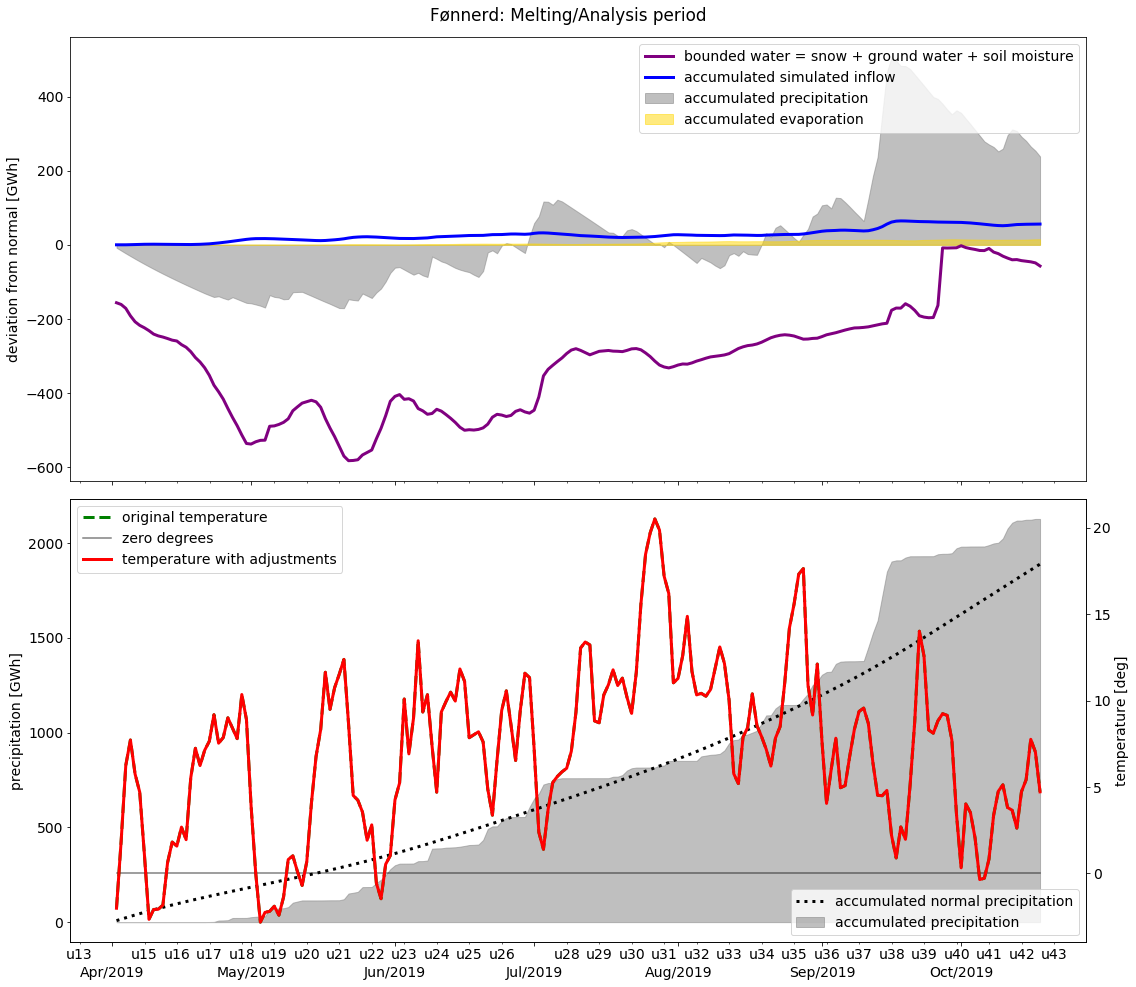

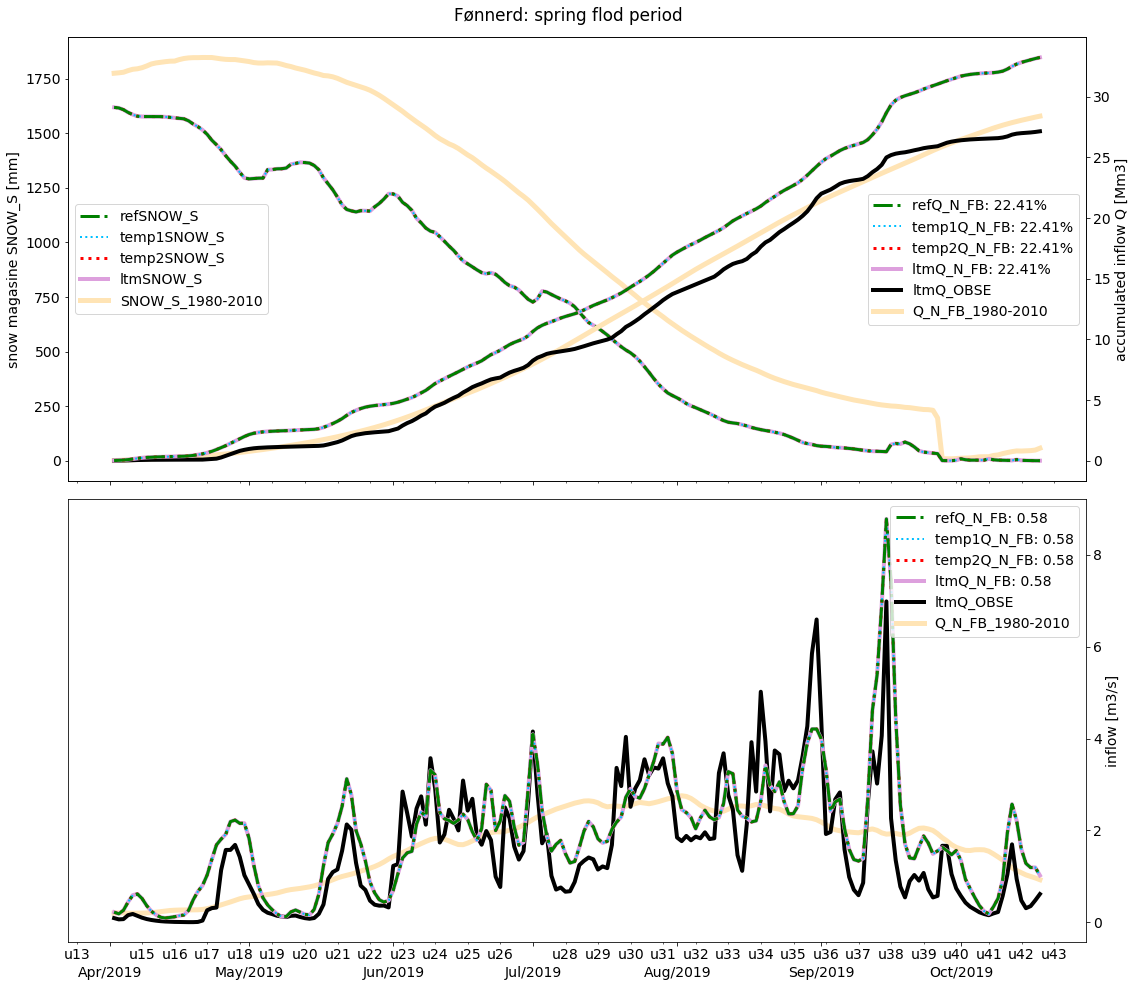

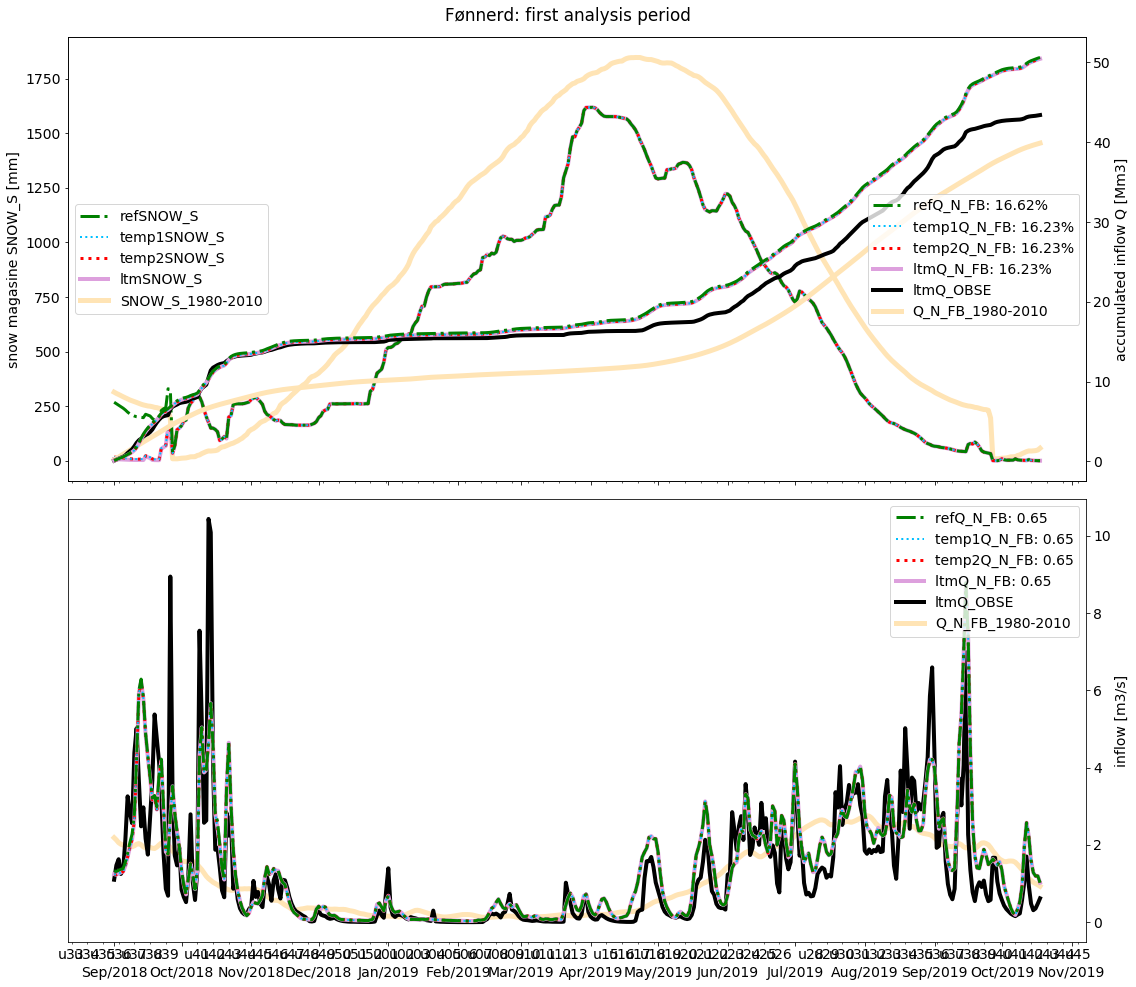

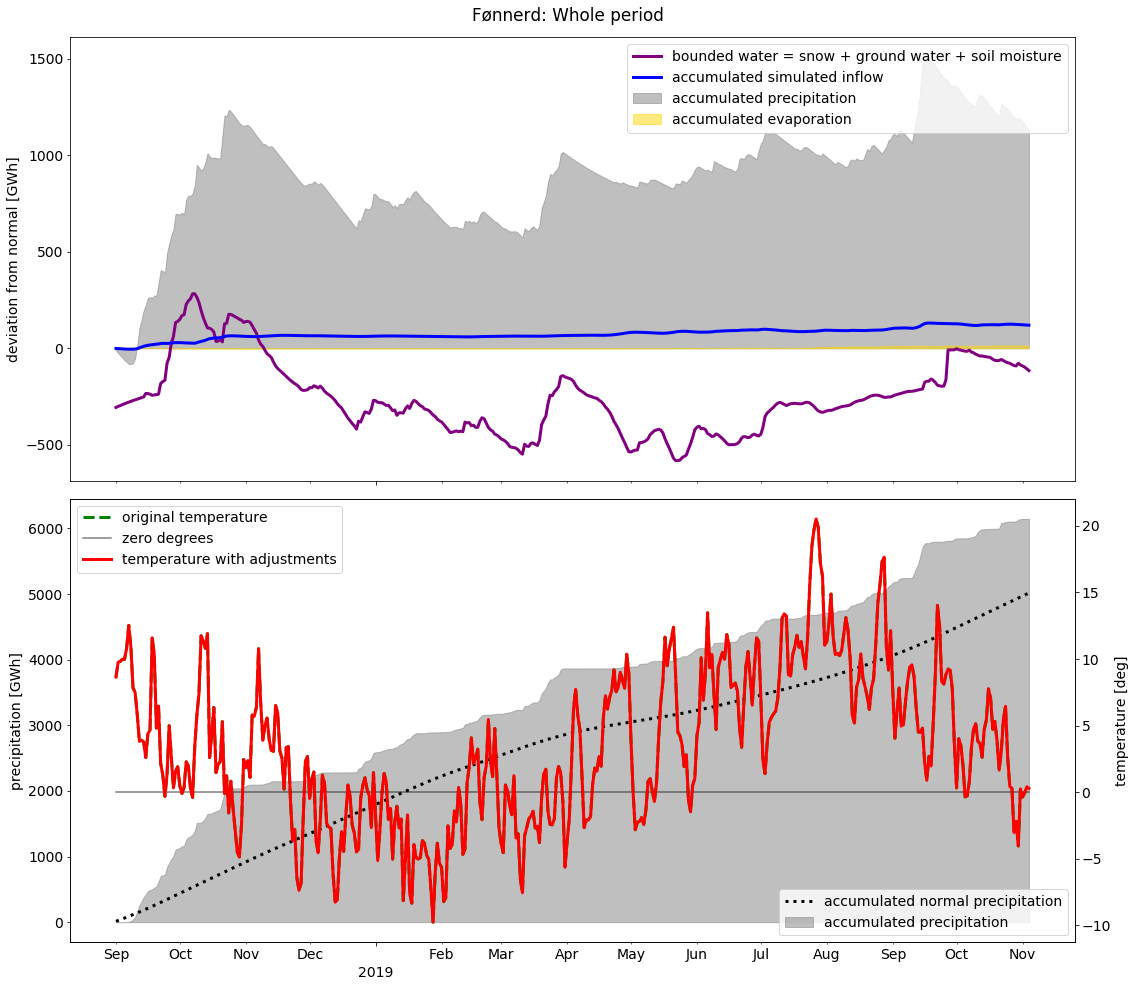

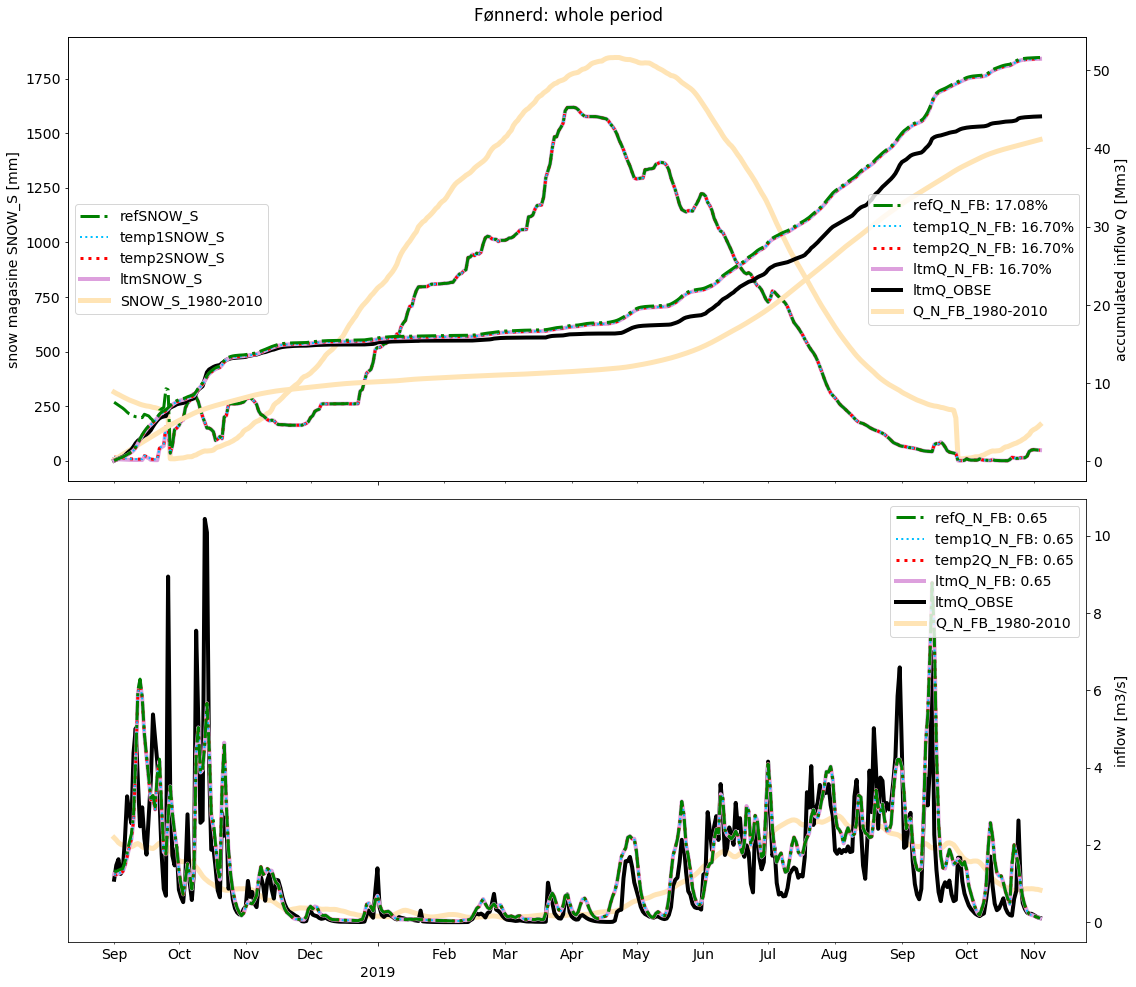








------------------------------------------------------------------------------------------------------------------------
                                                        Gjersta
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-09): Peak of snow magasine for ref inndatasett.
Analysis end (2019-05-01): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 10 GWh SWE.


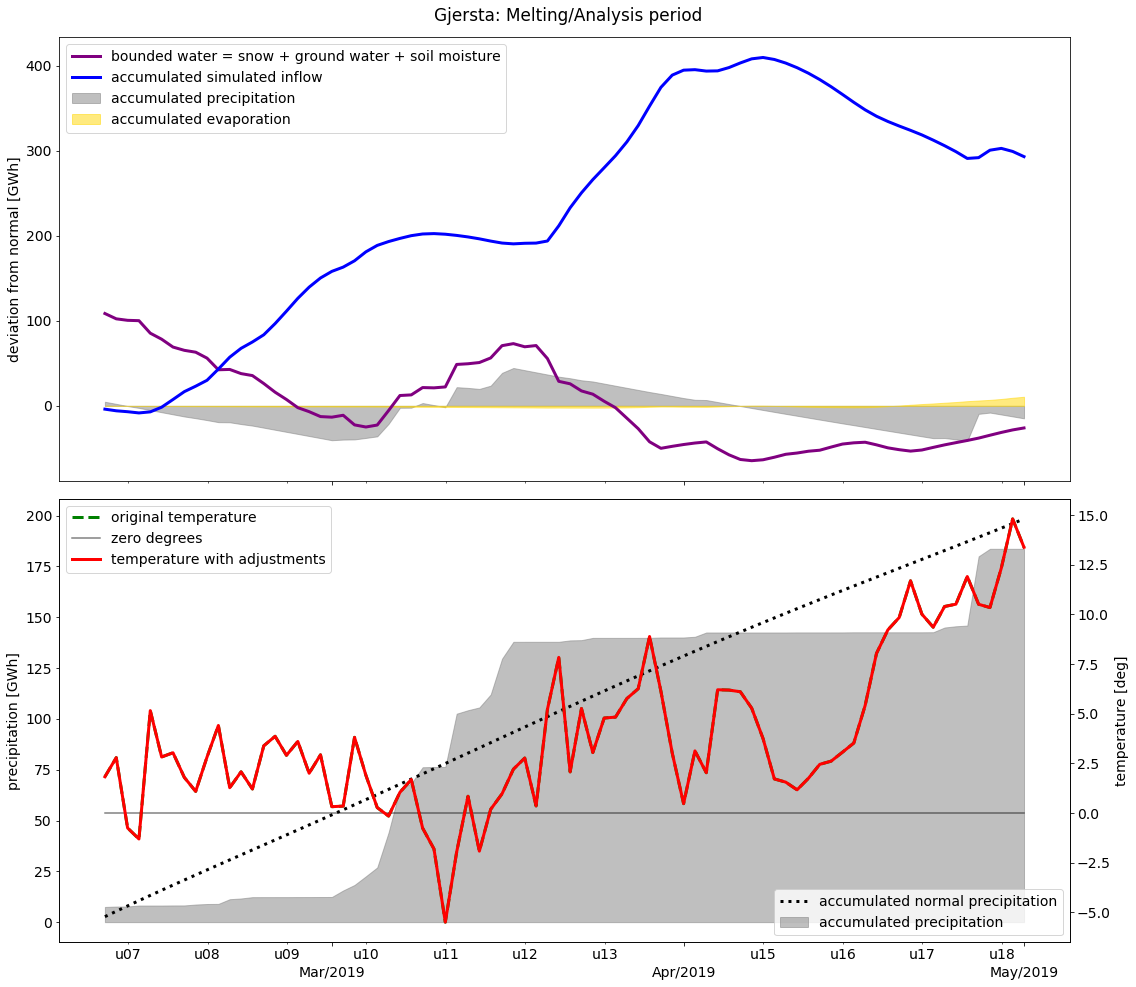

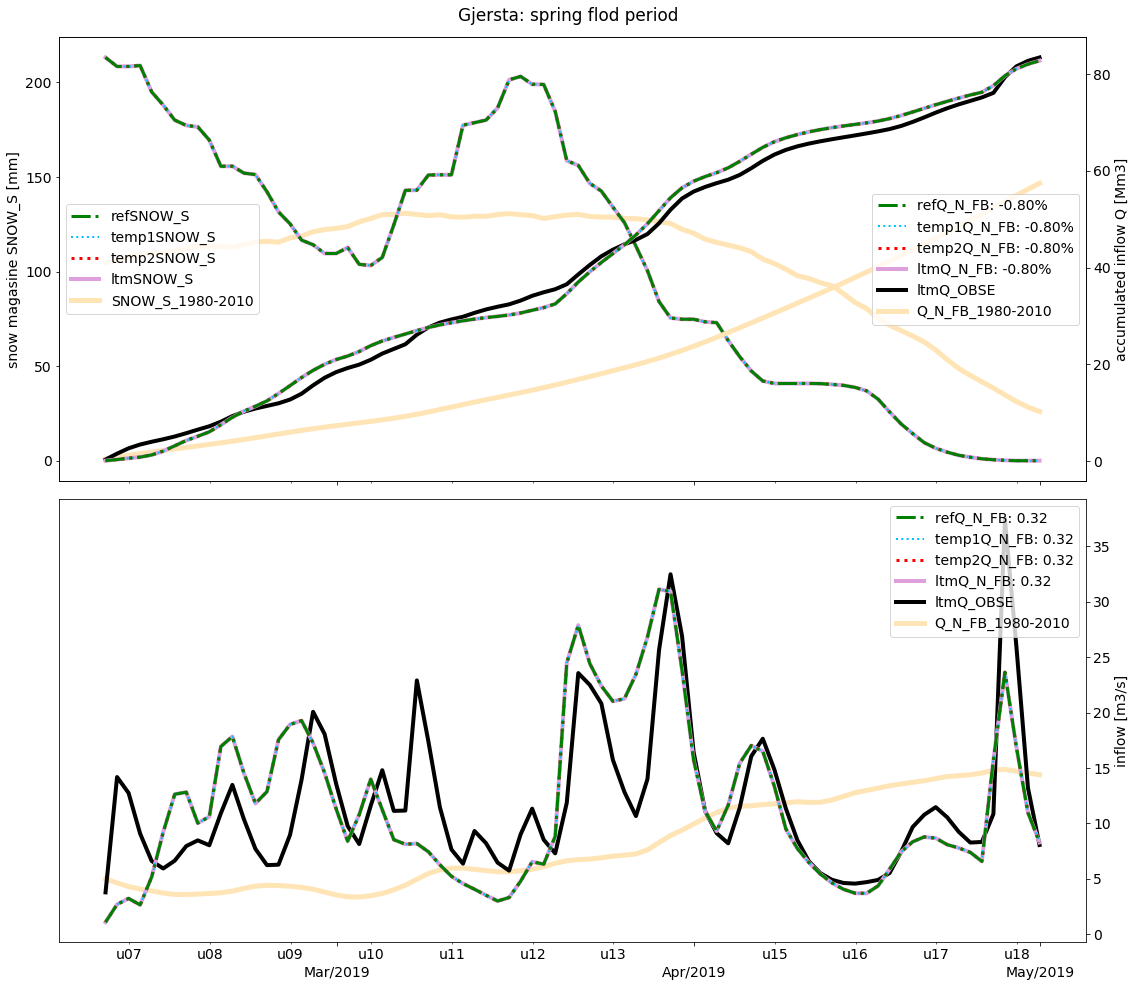

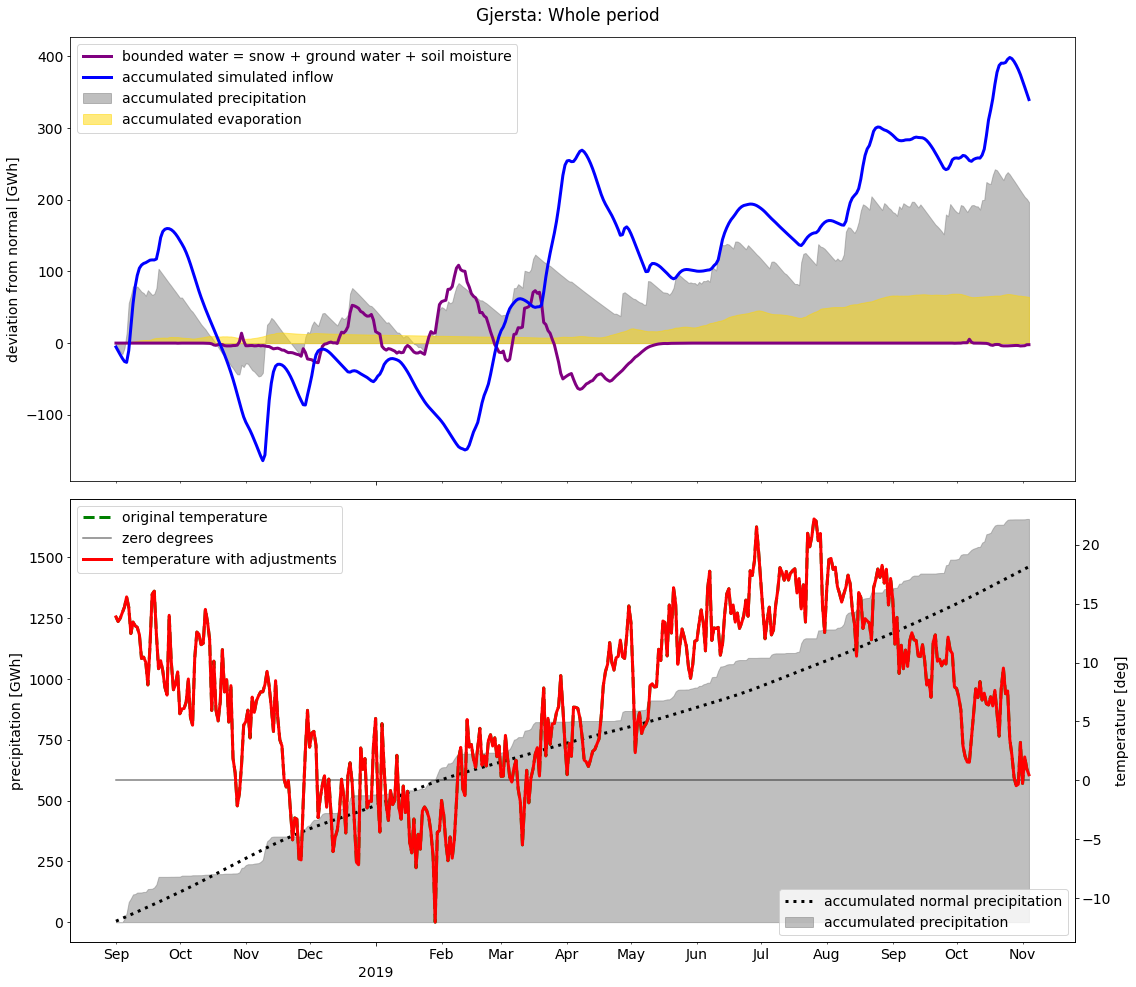

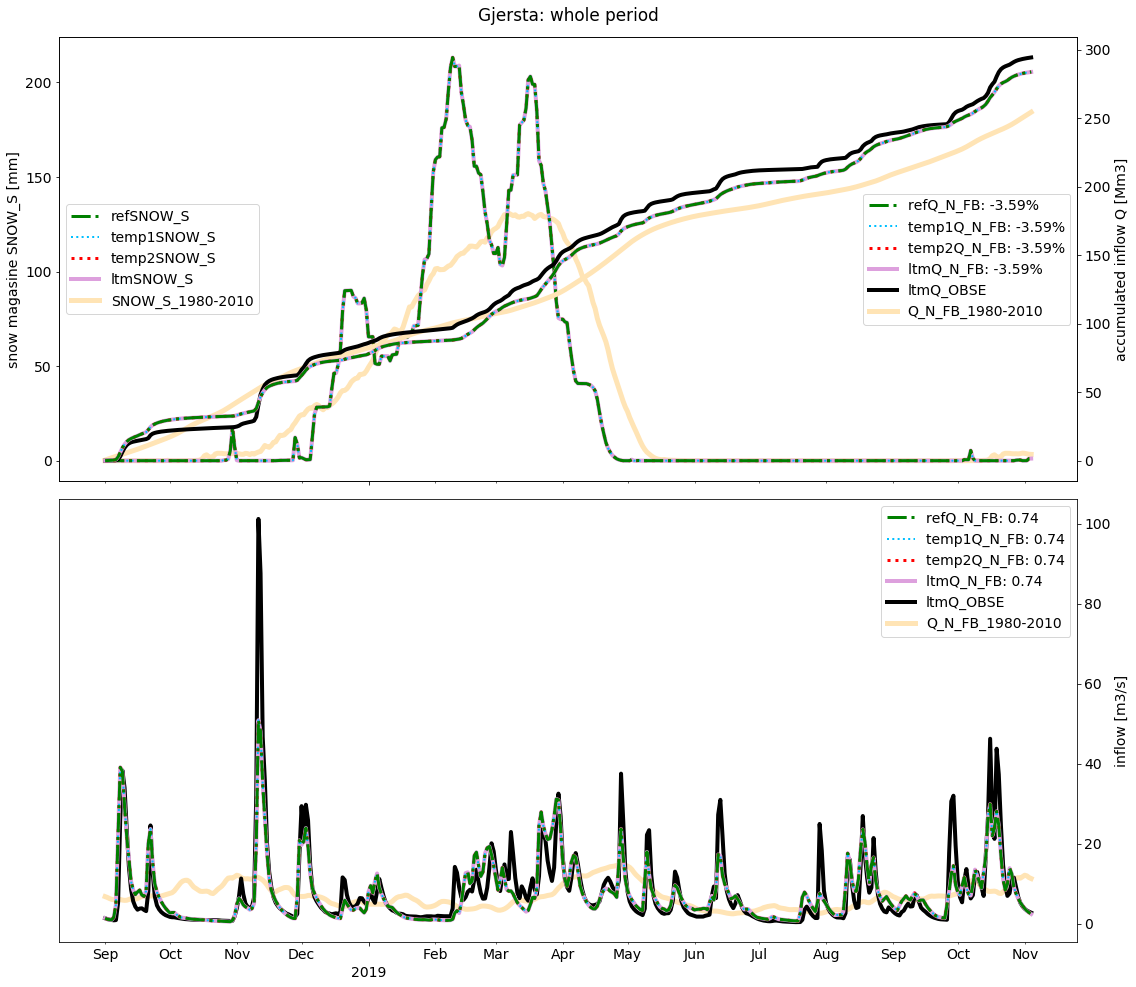








------------------------------------------------------------------------------------------------------------------------
                                                        Grimsv
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-26): Peak of snow magasine for ref inndatasett.
WARNING! Analysis end (2019-08-05): this script did not find a sufficient estimation of the end of the spring flod, used here date for the ref snow magasine minimum.

Comment from Excel file: "En god vurdering med temperaturjustering."



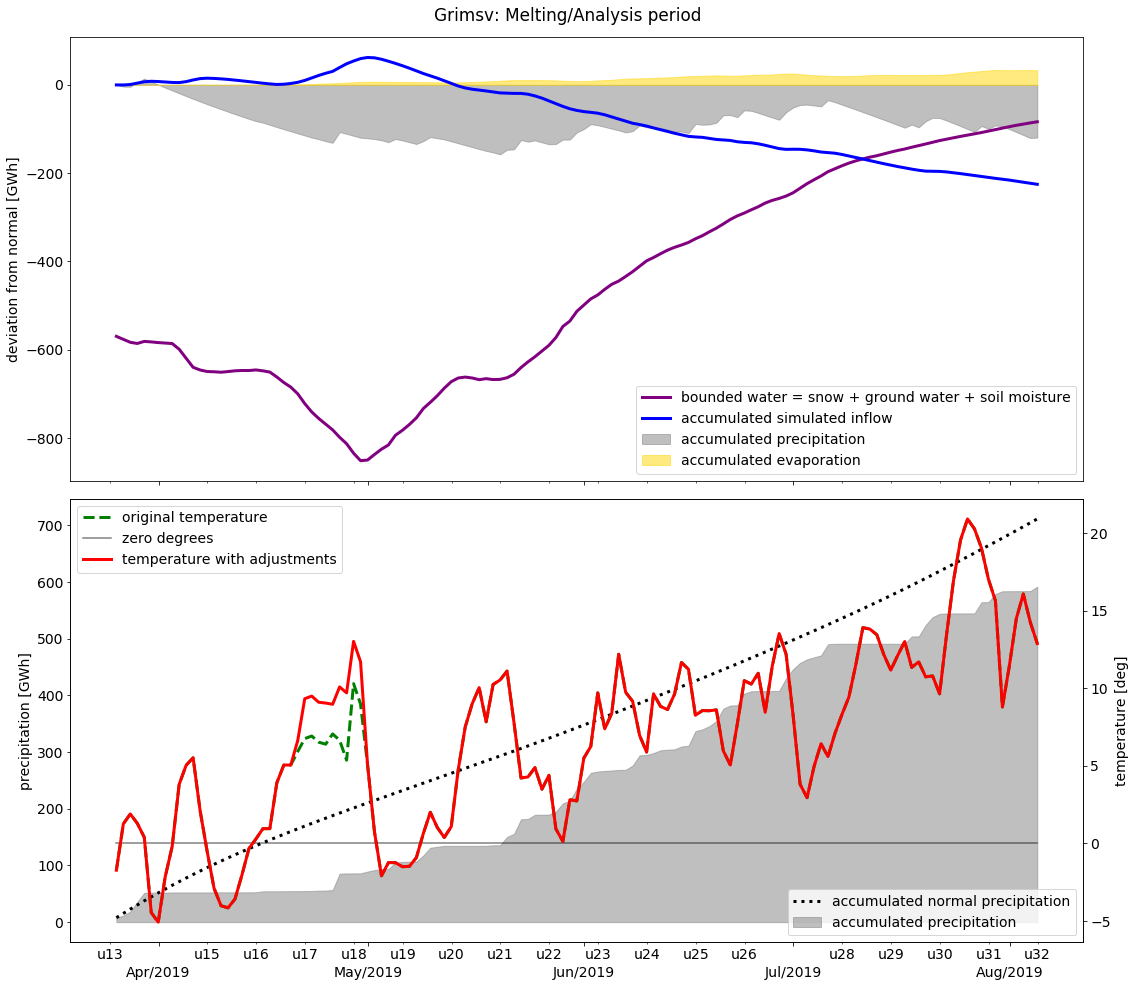

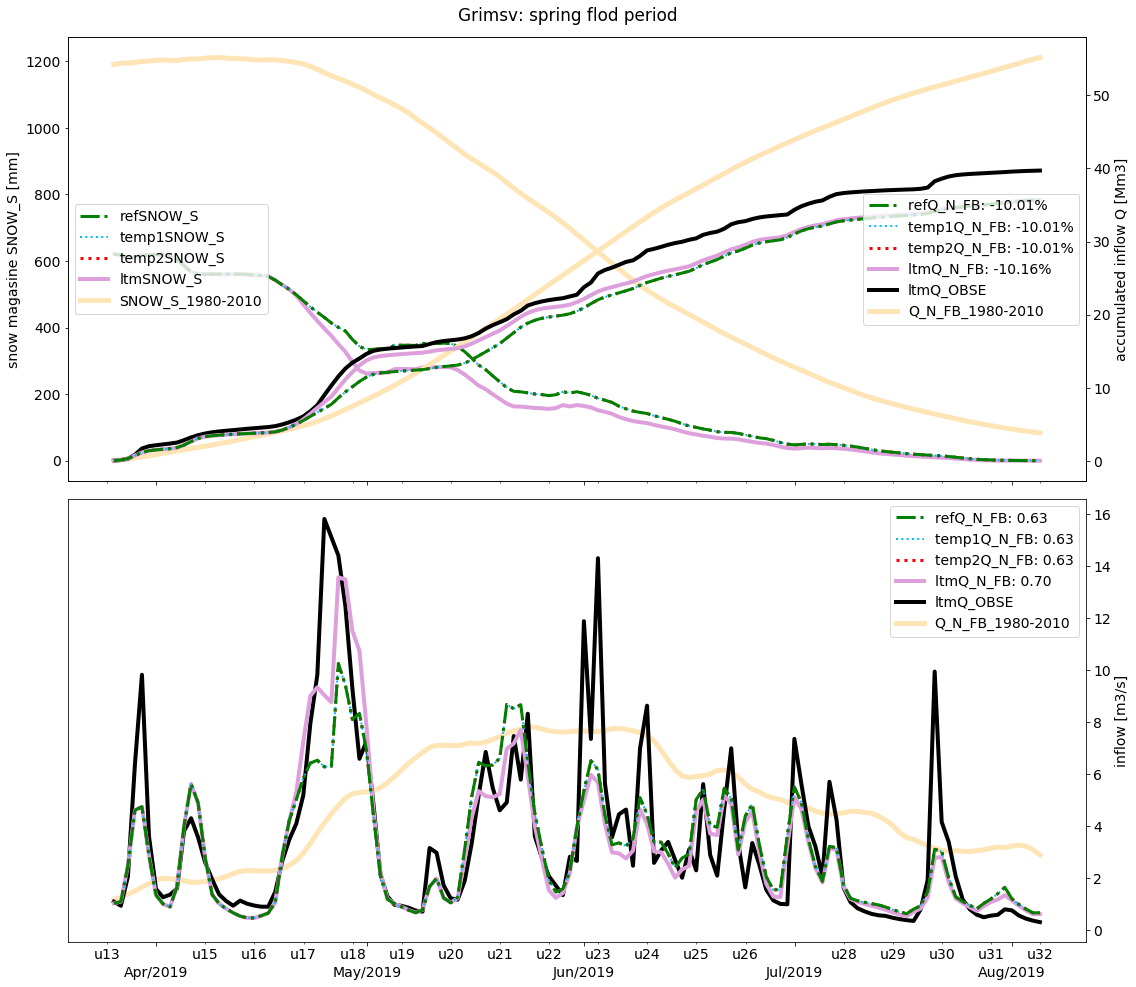

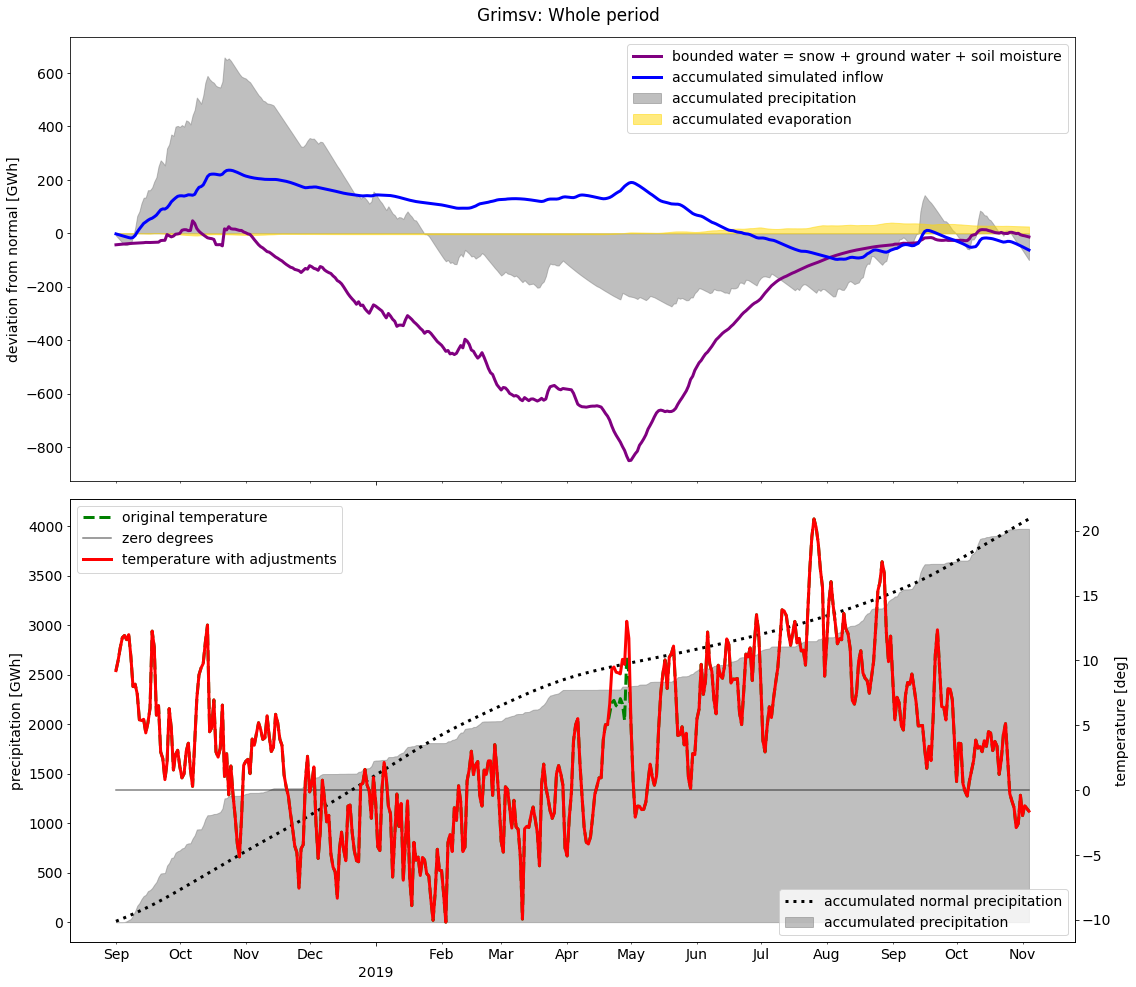

In [ ]:
m.make_all(sheet, all_df, all_resources, analysis_periods_output, excel_output, excluded_keys, file)